# Notebook for Cut Face Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
from scipy.stats import norm

import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm
import math as math

%config InlineBackend.figure_format = 'retina'

In [2]:
viridis = cm.get_cmap('viridis', 10)

In [3]:
Cutface_specimens = pd.read_csv('../../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

Cutface_lat = 47.73055
Cutface_lon = -90.44128

## Plot directions

In [4]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_lt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [5]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_lt

{'dec': 359.3140071973992,
 'inc': 67.19770761735734,
 'n': 109,
 'r': 106.65359727244838,
 'k': 46.02790421774432,
 'alpha95': 2.0157272974389002,
 'csd': 11.93917776476927}

In [6]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 286.49699313337345,
 'inc': 42.003560540334476,
 'n': 167,
 'r': 163.55867702232504,
 'k': 48.23726255190197,
 'alpha95': 1.5861242493209464,
 'csd': 11.662554654251615}

In [7]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 286.57662835036626,
 'inc': 29.430252935780295,
 'n': 157,
 'r': 152.63958083558612,
 'k': 35.77637702199419,
 'alpha95': 1.9070660543868,
 'csd': 13.542125665843008}

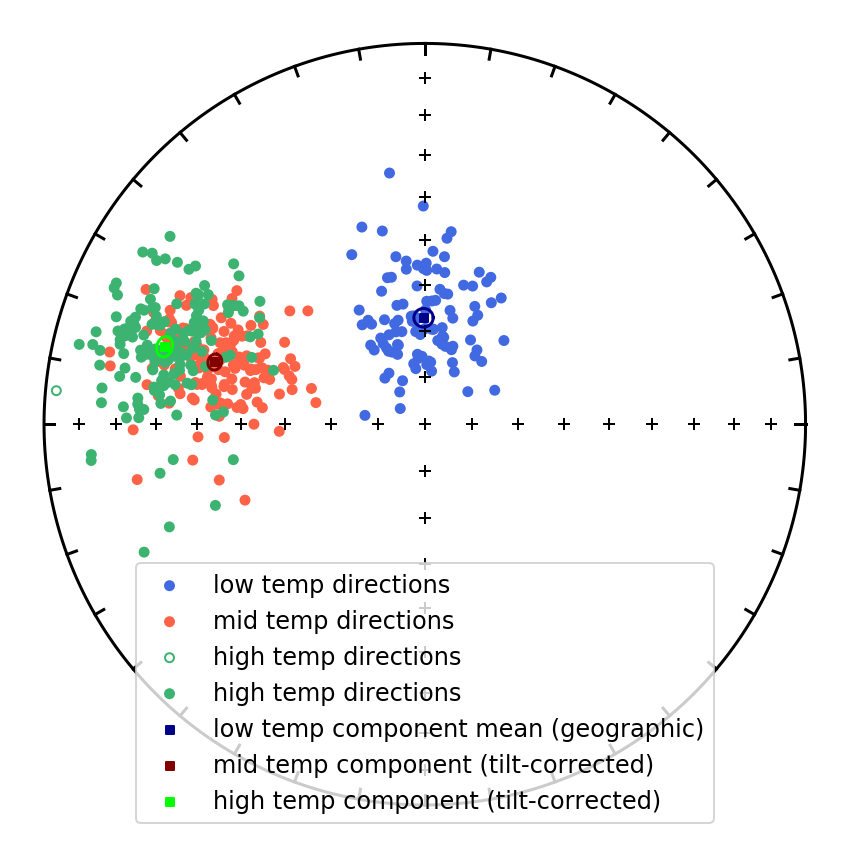

In [8]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='royalblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='mediumseagreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='maroon', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='lime', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=12)
# plt.savefig('../code_output/specimen_directions.pdf')
plt.show()

### PDF

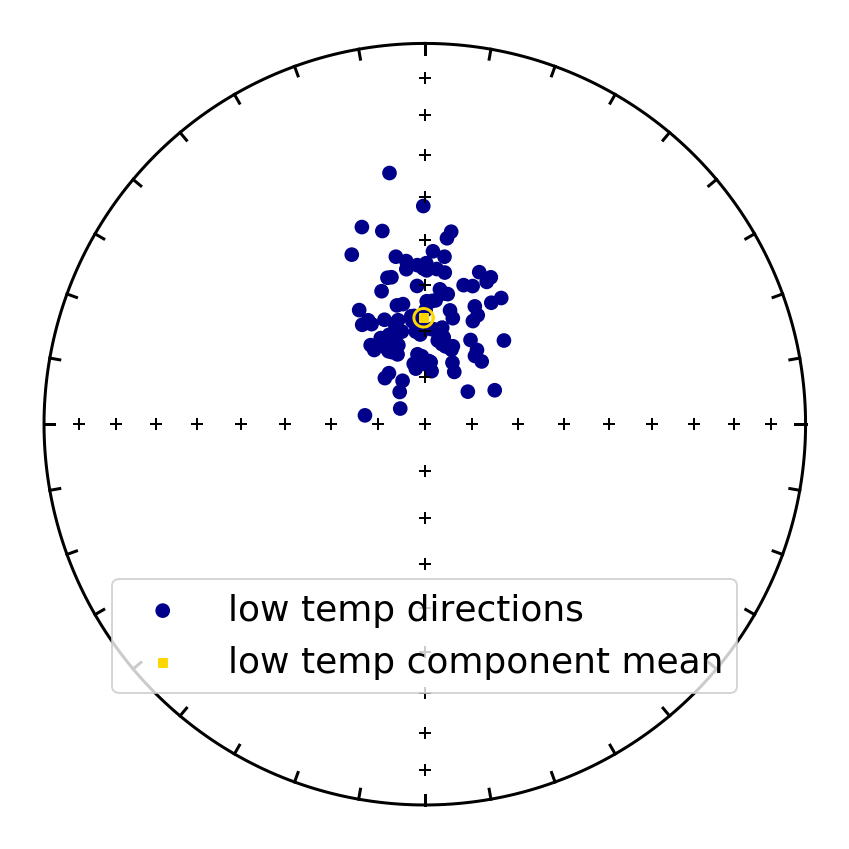

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='darkblue',label='low temp directions', markersize=40)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='gold', marker = 's', label='low temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.15),fontsize=18)
# plt.savefig('../code_output/specimen_directions_lt.pdf',transparent=True)
plt.show()

### CRM

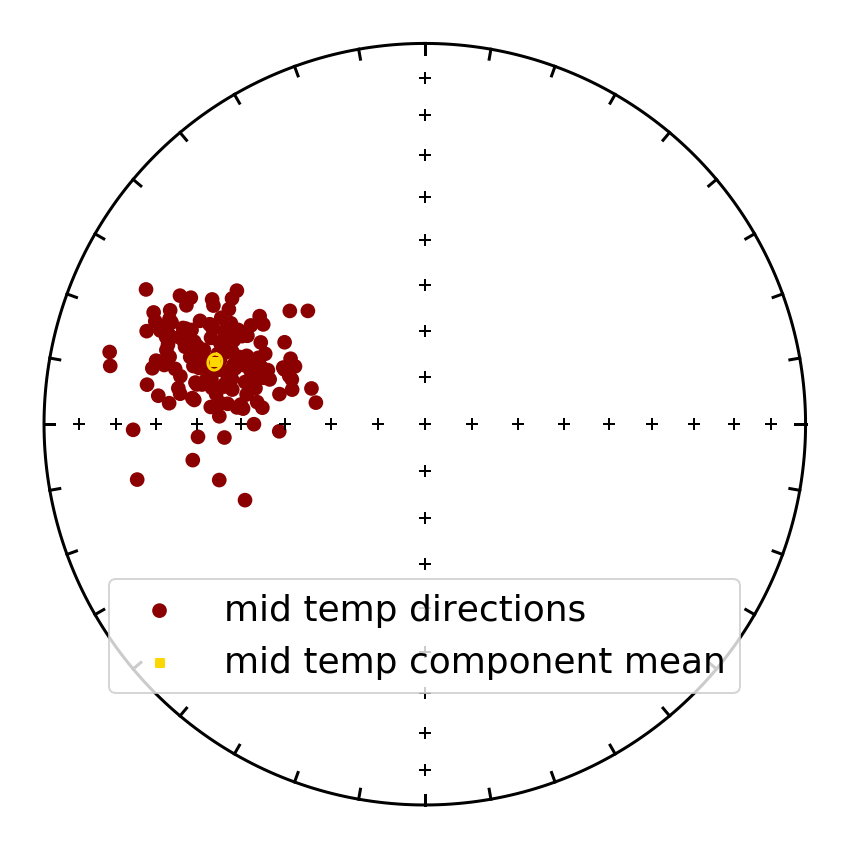

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='darkred',label='mid temp directions',markersize=40)

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                    color='gold', marker = 's', label='mid temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.15),fontsize=18)
# plt.savefig('../code_output/specimen_directions_mt.pdf',transparent=True)
plt.show()

### DRM

In [11]:
specimens_ht_tc_above_0=specimens_ht_tc[specimens_ht_tc['dir_inc']<0]
specimens_ht_tc_below_0=specimens_ht_tc[specimens_ht_tc['dir_inc']>0]
specimens_ht_tc_above_0

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site
310,CF-134a,CF-134a_LP-DIR-T,CF-134,NaN,ht,275.2,-3.2,3.0,10.0,100.0,3.5,9.7,960.0,937.0,K,NaN,hargrave 2021-02-13 19:30:03,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cut Face Creek,CF


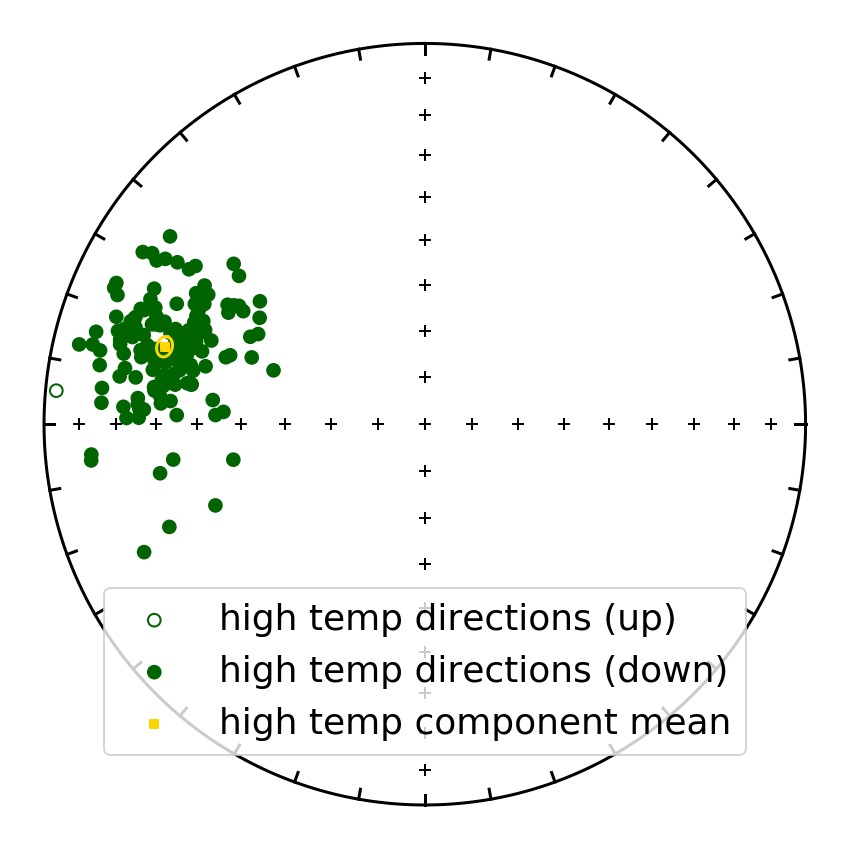

In [12]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_ht_tc_above_0['dir_dec'].tolist(),specimens_ht_tc_above_0['dir_inc'].tolist(),color='darkgreen',label='high temp directions (up)',markersize=40)
ipmag.plot_di(specimens_ht_tc_below_0['dir_dec'].tolist(),specimens_ht_tc_below_0['dir_inc'].tolist(),color='darkgreen',label='high temp directions (down)',markersize=40)

ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='gold', marker = 's', label='high temp component mean')

plt.legend(loc=8,bbox_to_anchor=(0.50,0.075),fontsize=18)
# plt.savefig('../code_output/specimen_directions_ht.pdf',transparent=True)
plt.show()

### Let's visualize DRM upon different unsquishing factors

In [13]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing

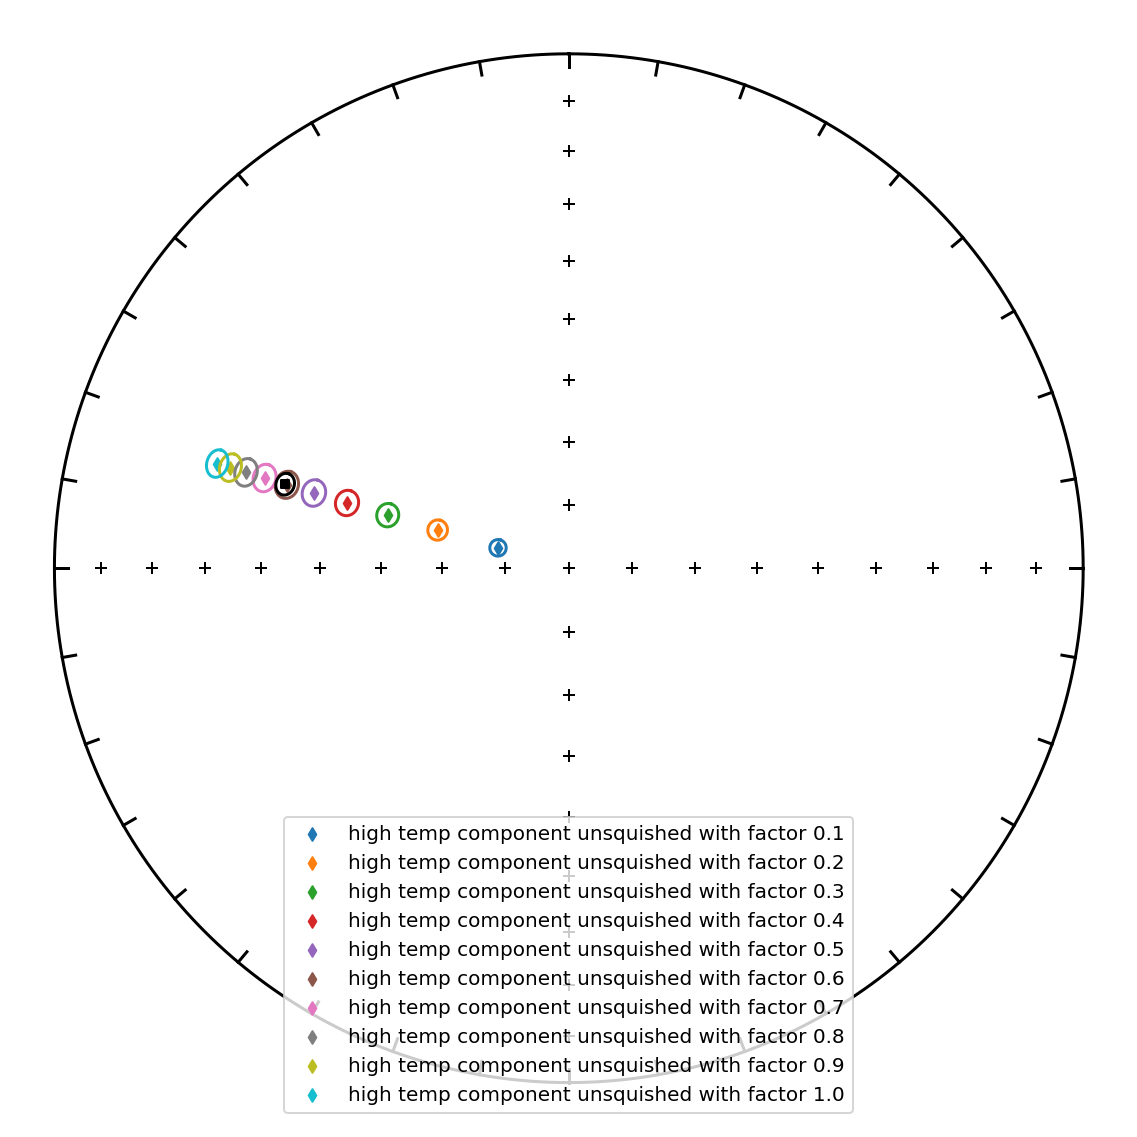

In [14]:
CF_undquished_mean_list = unsquish_factors(specimens_ht_tc['dir_dec'].tolist(), specimens_ht_tc['dir_inc'].tolist(), n=10) 
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='black', marker = 's', label='mid temp component (tilt-corrected)')

### plot in pole space

<Figure size 360x360 with 0 Axes>

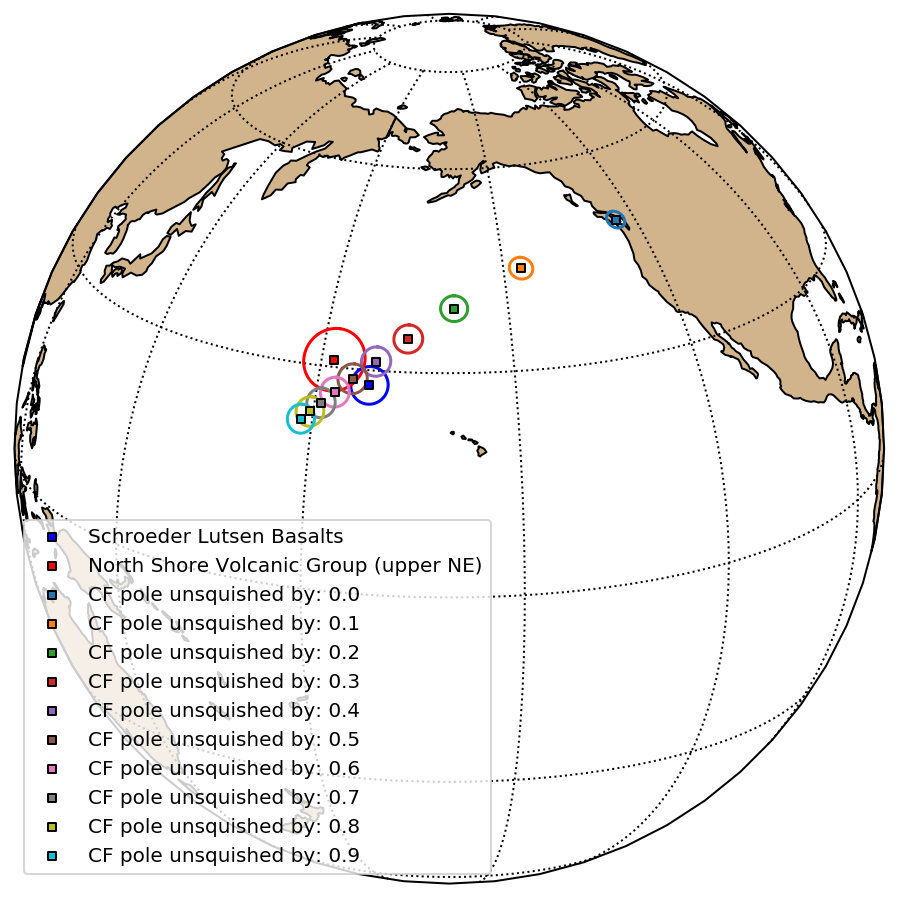

In [15]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()

## Plot IGRF, dipole, CF, and NSVG together

### Local geomagnetic field 

Calculate the local geomagnetic field at the study site both using the IGRF model and the long-term dipole field using the dipole equation.

In [16]:
local_igrf = ipmag.igrf([2020.7664, 188, Cutface_lat, Cutface_lon])
local_igrf_dec = local_igrf[0]
local_igrf_inc = local_igrf[1]

local_dipole_dec = 0
local_dipole_inc = ipmag.inc_from_lat(Cutface_lat)
local_igrf

array([  357.5029463624409 ,    73.03790699273897, 50872.59445578779   ])

## Expected direction from NSVG

Here we take the NSVG upper northeast sequence pole as calculated in Swanson-Hysell et al. 2019 and determine the predicted direction for the Cutface Creek section.

In [17]:
NSVG_Data=pd.read_csv('../../data/data_Compiled/Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
Books1972_sites = pd.read_csv('../../data/data_compiled/Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()


nneu_dirs = ipmag.make_di_block(nneu_combined_dir_dec,
                                nneu_combined_dir_inc)
nneu_dir_mean=pmag.fisher_mean(nneu_dirs)
nneu_dir_mean

{'dec': 291.3242830230793,
 'inc': 40.25007073978004,
 'n': 28,
 'r': 27.15979233643242,
 'k': 32.134912796862814,
 'alpha95': 4.883450101163713,
 'csd': 14.288822983259386}

In [18]:
NSVG_a95=4.9

In [19]:
mt_tc_di_block = ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())

In [56]:
mt_vs_NSVG_mean_test=ipmag.common_mean_watson(mt_tc_di_block,nneu_dirs)
mt_vs_NSVG_mean_test

Results of Watson V test: 

Watson's V:           2.8
Critical value of V:  6.2
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 3.4
Critical angle for M&M1990:   5.1
The McFadden and McElhinny (1990) classification for
this test is: 'B'


(1, 3.402632503993828, 5.068181417391994)

In [19]:
NSVG_pole_lat = 31.1 
NSVG_pole_lon = 181.7
NSVG_A95 = 4.2

# calculated expected dec, inc at the location of Cut Face Creek based on NSVG NE mean pole position
NSVG_dec, NSVG_inc = pmag.vgp_di(NSVG_pole_lat,NSVG_pole_lon,Cutface_lat, Cutface_lon)
NSVG_dec, NSVG_inc

(290.7248681709183, 41.43279095168165)

### Plot theoretical expected inclination vs observed inclination

In [20]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [21]:
NE_NSVG_inc = 41.4

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)
nsvg_f_2 = ipmag.squish(NE_NSVG_inc,.2)
nsvg_f_1 = ipmag.squish(NE_NSVG_inc,.1)

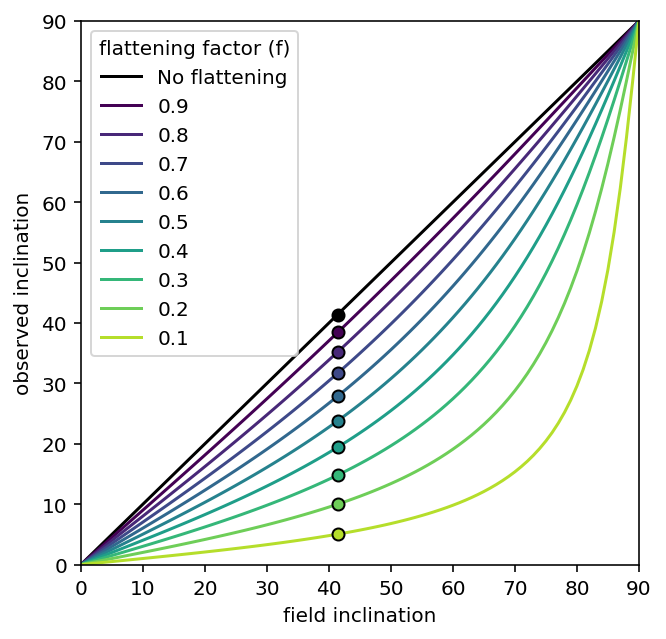

In [22]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_2, label='0.2', color=viridis(7))
plt.scatter(NE_NSVG_inc,nsvg_f_2,color=viridis(7),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_1, label='0.1', color=viridis(8))
plt.scatter(NE_NSVG_inc,nsvg_f_1,color=viridis(8),edgecolors='black',zorder=100)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
# obs_vs_measure_plot.savefig('../code_output/field_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

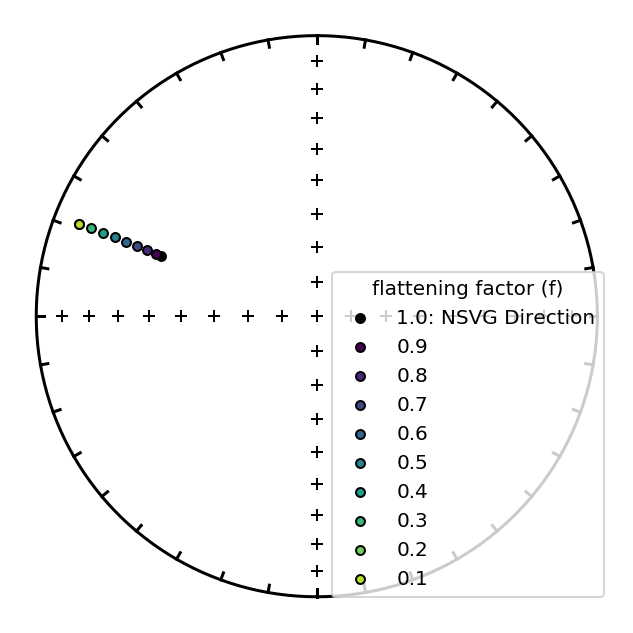

In [23]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(4.5,4.5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(7), label='0.2',edge='black')
ipmag.plot_di(291.3, nsvg_f_2, color=viridis(8), label='0.1',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
#plt.title('Shallowing of the Upper Northeast Sequence NSVG Direction', size=16)
# upper_nsvg_shallowing.savefig('../code_output/upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

### direction component means

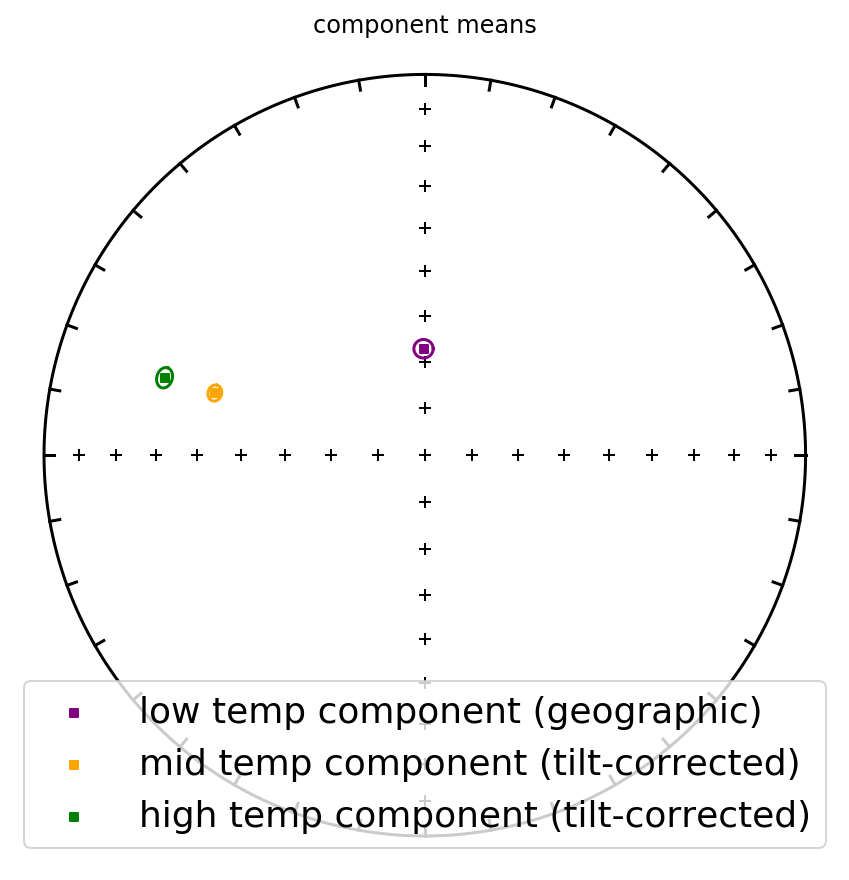

In [24]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='purple', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='orange', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='green', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=18)
plt.title('component means')
plt.show()

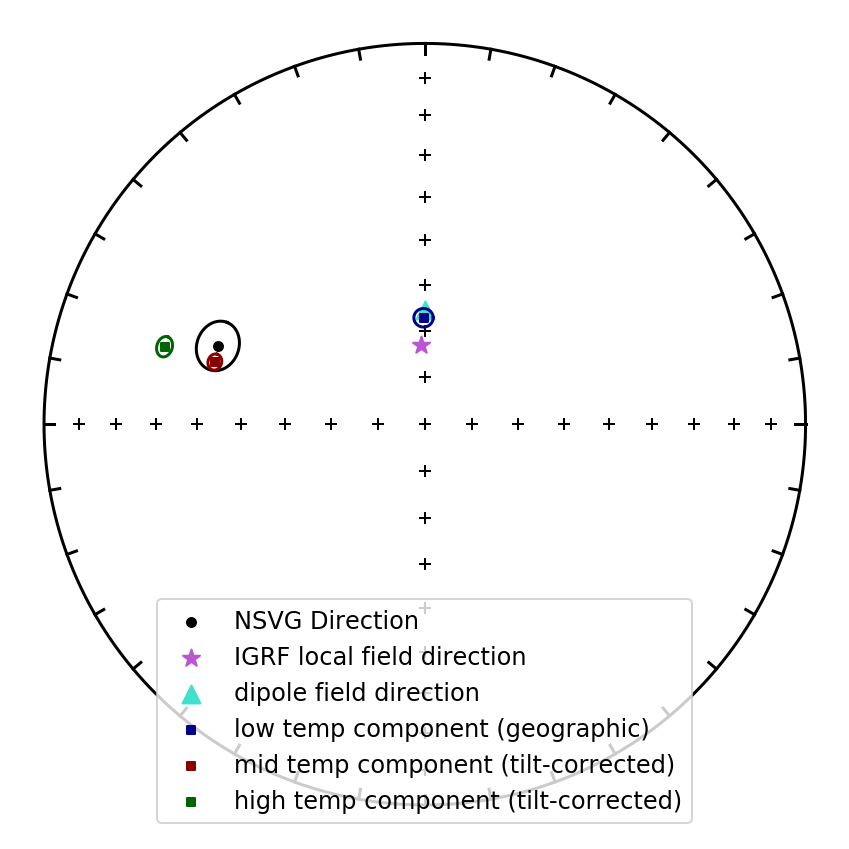

In [186]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_a95, label='NSVG Direction') #need to replace with direction a95
ipmag.plot_di([local_igrf_dec],[local_igrf_inc], marker = '*', label='IGRF local field direction', markersize=80, color='mediumorchid')
ipmag.plot_di([local_dipole_dec],[local_dipole_inc], marker = '^',label='dipole field direction',markersize=80, color='turquoise')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8, fontsize=12)
cf_igrf_nsvg_stereonet.savefig('../code_output/cf_igrf_nsvg_stereonet.pdf', bbox_inches='tight')
plt.show()

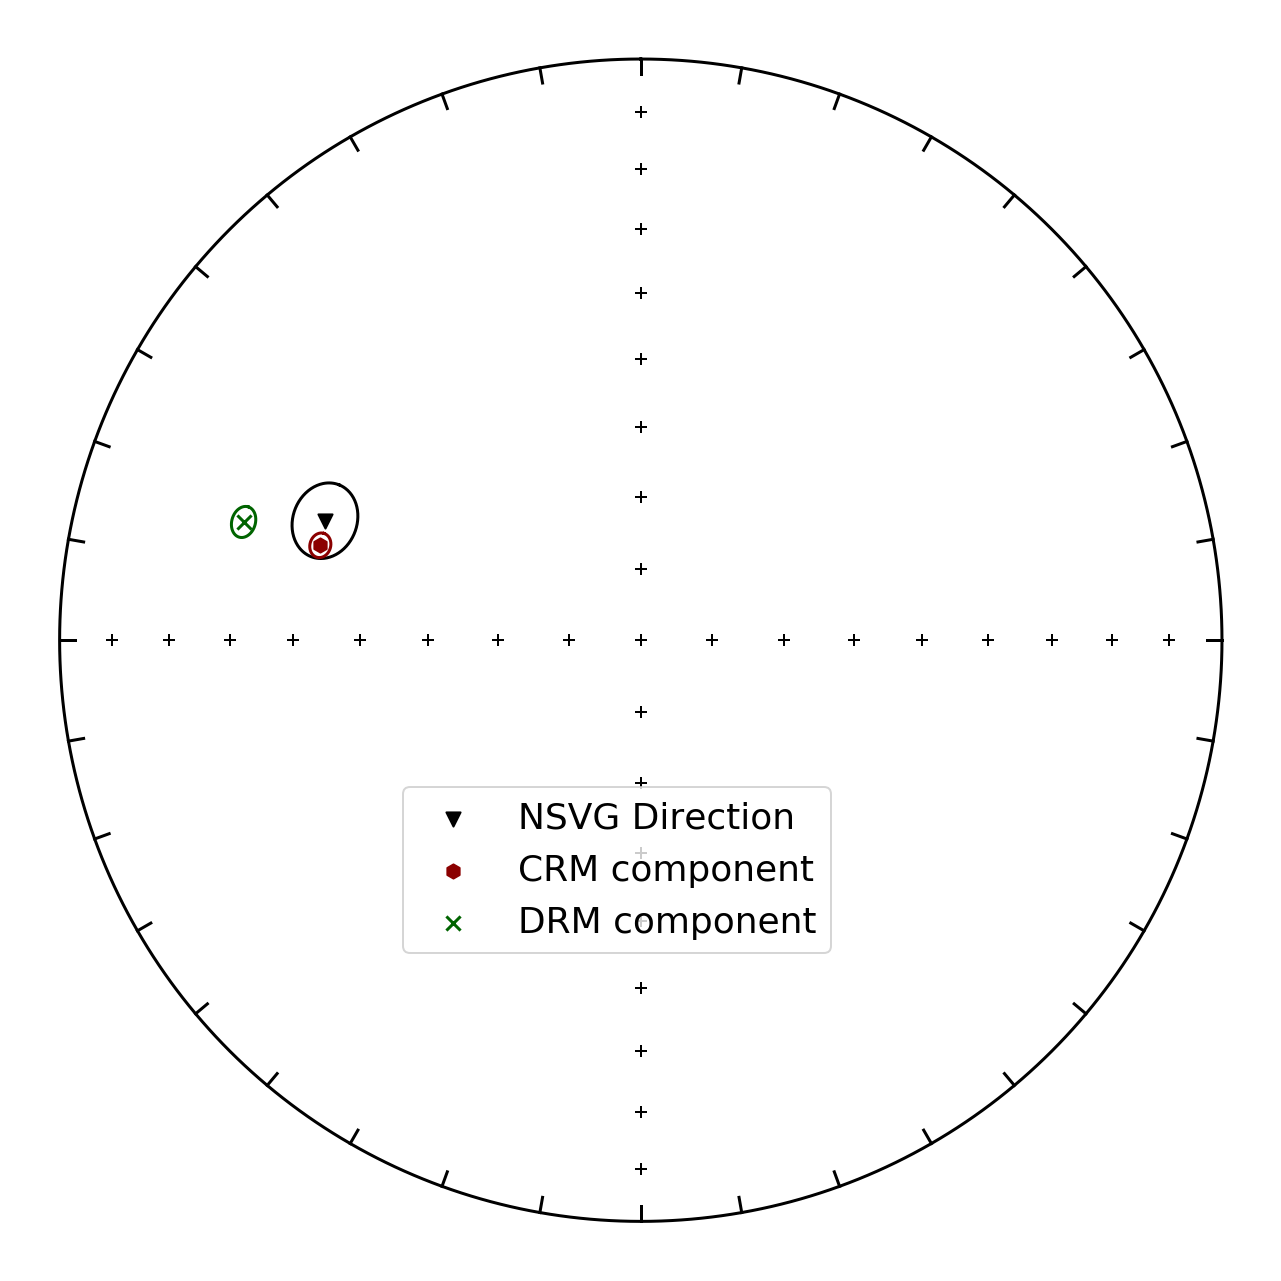

In [187]:
cf_results_stereonet=plt.figure(num=fignum,figsize=(9,9))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_a95, label='NSVG Direction',color= 'k',marker='v',markersize=50) #need to replace with direction A95

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color= 'darkred', marker = 'h', label='CRM component',markersize=50)
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 'x', label='DRM component',markersize=50)

#unsquish_label = 'high temp component (f=' + str(np.round(best_f_mt,3)) +  ' corrected)'
#ipmag.plot_di_mean(ht_mean_NSVG_unsquish['dec'],ht_mean_NSVG_unsquish['inc'],ht_mean_NSVG_unsquish['alpha95'],
                   #color='mediumseagreen', marker = '^', label=unsquish_label)
plt.legend(loc=[.31,.25],fontsize=18)
# cf_results_stereonet.savefig('../code_output/cf_results_stereonet.pdf', bbox_inches='tight',transparent=True)


plt.show()

## Empirical flattening factor determination

$tan(I_{observed}) = f*tan(I_{field})$

$I_{observed}$ : inclination of sedimentary rock \
$I_{field}$ : inclination of local magnetic field when rock was magnetized \
$f$ : flattening factor

$f = tan(I_{observed})/tan(I_{field})$

In [27]:
f_factor_ht_mt = round(np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(mean_mt['inc'])),2)
f_factor_ht_mt

0.63

In [28]:
f_factor_ht_NSVG = round(np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(41.4)), 2)
f_factor_ht_NSVG

0.64

## Plot local volcanic directions

In [29]:
ghb_tp_specimens = pd.read_csv('../../data/Pmag/GHB_TP/specimens.txt', sep='\t', header=1)
ghb_tp_specimens_mt_geo = ghb_tp_specimens[(ghb_tp_specimens['dir_comp']=='Fit 1') & (ghb_tp_specimens['dir_tilt_correction']==0)]
ghb_tp_specimens_mt_tc = ghb_tp_specimens[(ghb_tp_specimens['dir_comp']=='Fit 1') & (ghb_tp_specimens['dir_tilt_correction']==100)]

In [30]:
ghb_tp_specimens_GH1 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='GH1']
ghb_tp_specimens_GH2 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='GH2']
ghb_tp_specimens_TP1 = ghb_tp_specimens_mt_tc[ghb_tp_specimens['site']=='TP1']

In [31]:
GH1_mean = ipmag.fisher_mean(ghb_tp_specimens_GH1['dir_dec'].tolist(),ghb_tp_specimens_GH1['dir_inc'].tolist())
GH2_mean = ipmag.fisher_mean(ghb_tp_specimens_GH2['dir_dec'].tolist(),ghb_tp_specimens_GH2['dir_inc'].tolist())
TP1_mean = ipmag.fisher_mean(ghb_tp_specimens_TP1['dir_dec'].tolist(),ghb_tp_specimens_TP1['dir_inc'].tolist())

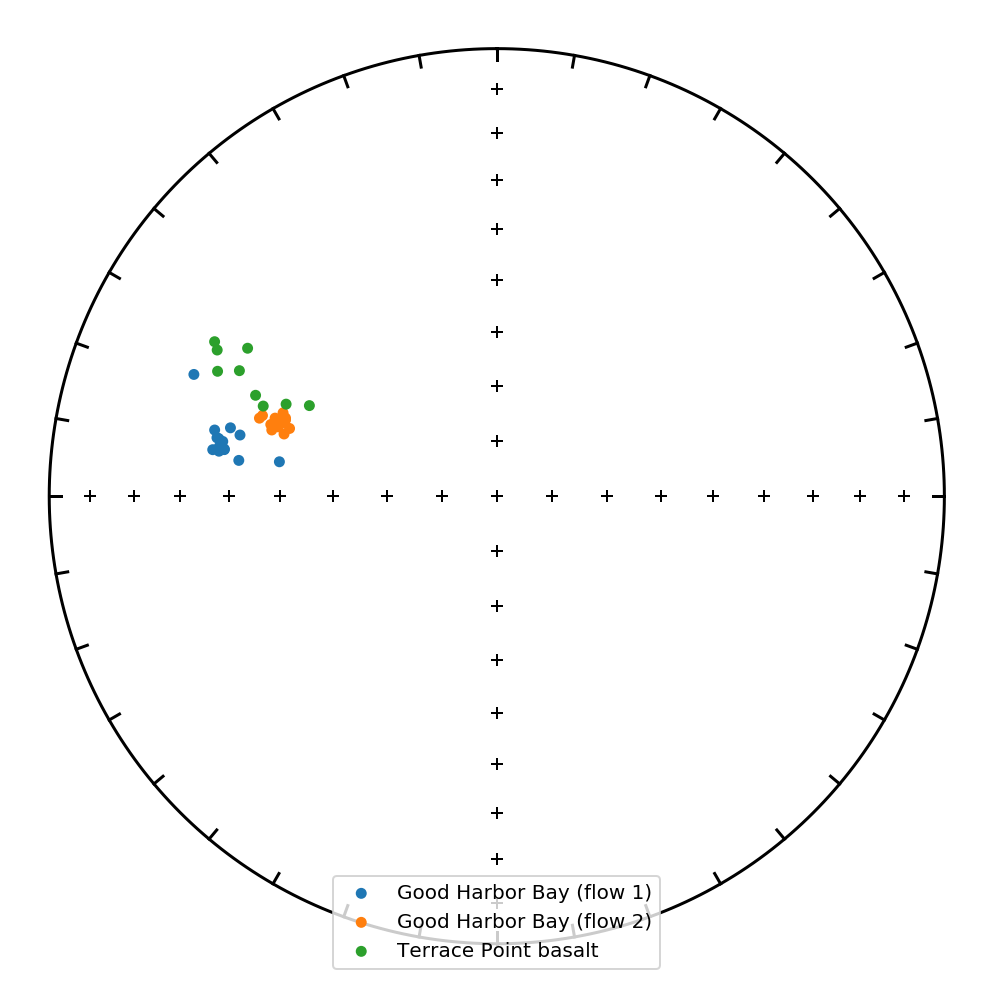

In [32]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)

ipmag.plot_di(ghb_tp_specimens_GH1['dir_dec'].tolist(),ghb_tp_specimens_GH1['dir_inc'].tolist(),color='C0',label='Good Harbor Bay (flow 1)')
ipmag.plot_di(ghb_tp_specimens_GH2['dir_dec'].tolist(),ghb_tp_specimens_GH2['dir_inc'].tolist(),color='C1',label='Good Harbor Bay (flow 2)')
ipmag.plot_di(ghb_tp_specimens_TP1['dir_dec'].tolist(),ghb_tp_specimens_TP1['dir_inc'].tolist(),color='C2',label='Terrace Point basalt')

plt.legend(loc=8)
plt.show()

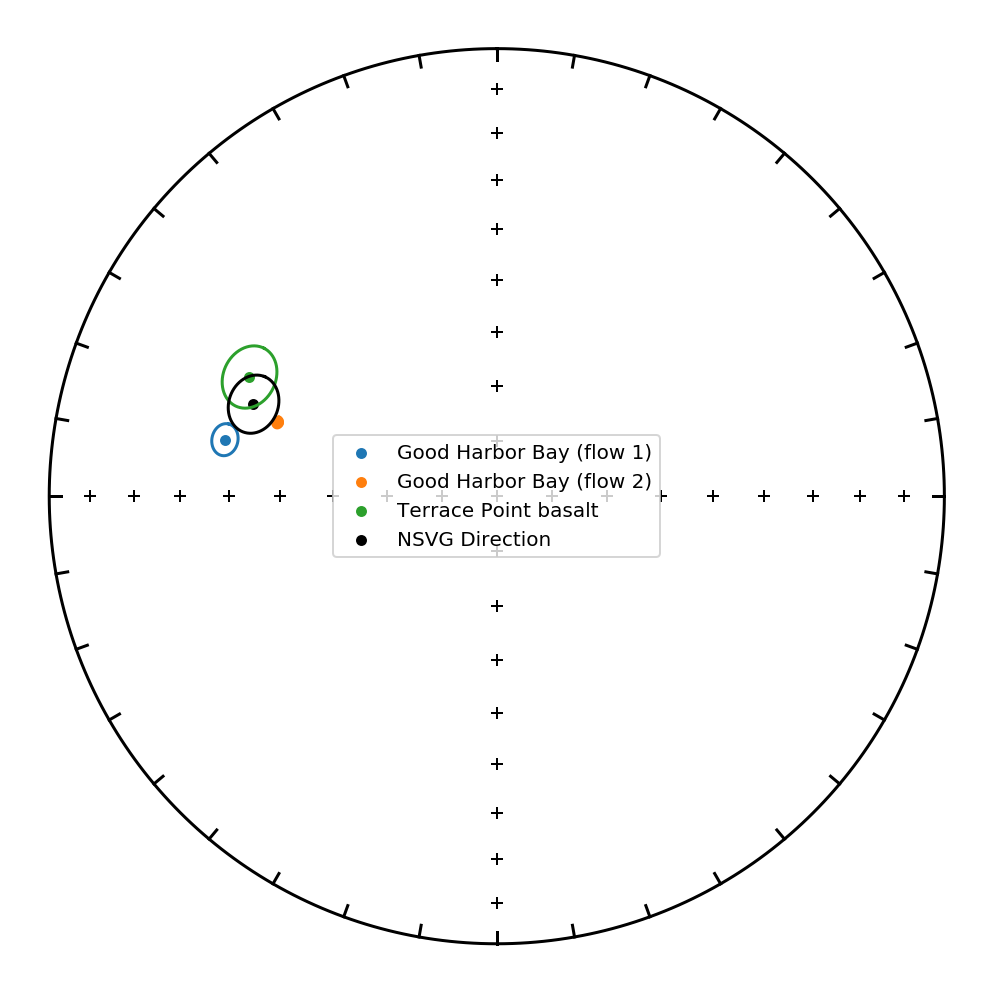

In [188]:
fignum = 1
plt.figure(num=fignum,figsize=(7,7))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(GH1_mean['dec'],GH1_mean['inc'],GH1_mean['alpha95'],color='C0',label='Good Harbor Bay (flow 1)')
ipmag.plot_di_mean(GH2_mean['dec'],GH2_mean['inc'],GH2_mean['alpha95'],color='C1',label='Good Harbor Bay (flow 2)')
ipmag.plot_di_mean(TP1_mean['dec'],TP1_mean['inc'],TP1_mean['alpha95'],color='C2',label='Terrace Point basalt')
ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_a95, label='NSVG Direction') 

plt.legend(loc=10)
plt.show()

## Implement the TK03 E/I method

In [29]:
ht_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())

Bootstrapping.... be patient

The original inclination was: 29.43

The corrected inclination is: 40.74
with bootstrapped confidence bounds of: 33.08 to 48.67
and elongation parameter of: 1.93
The flattening factor is: 0.64
with bootstrapped confidence bounds of: 0.87 to 0.5


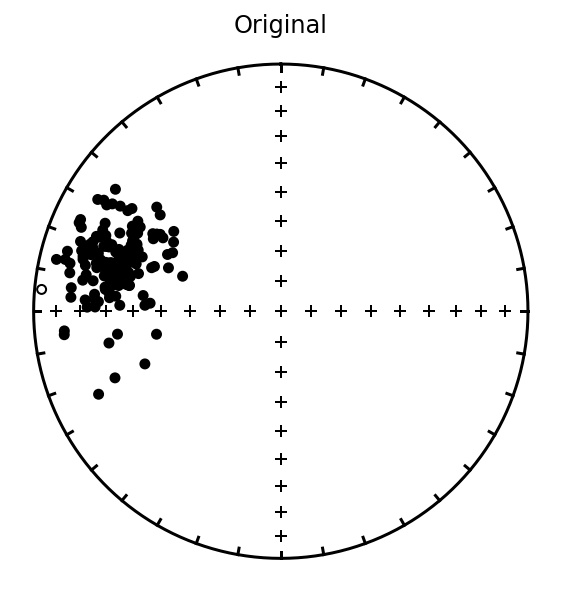

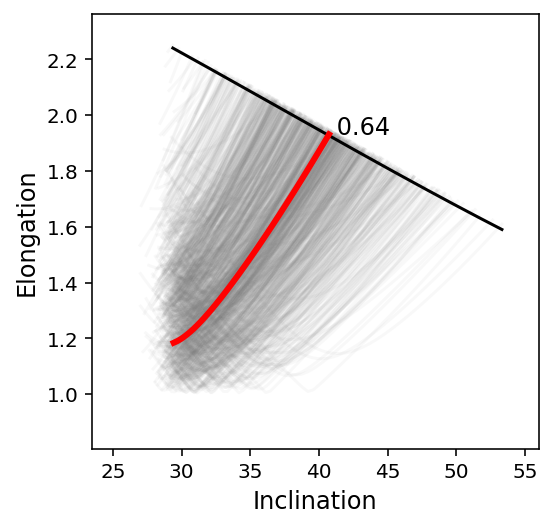

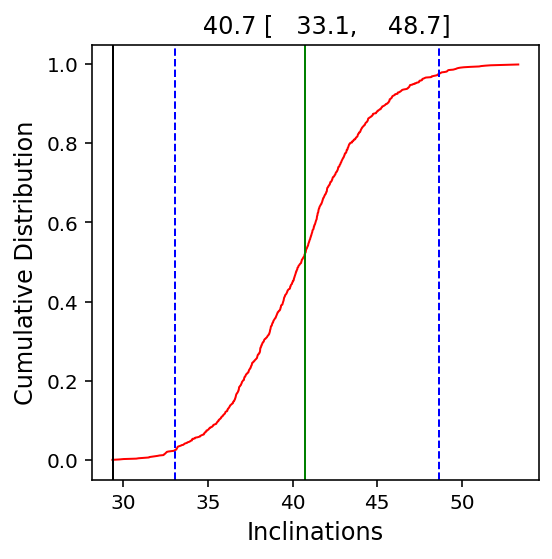

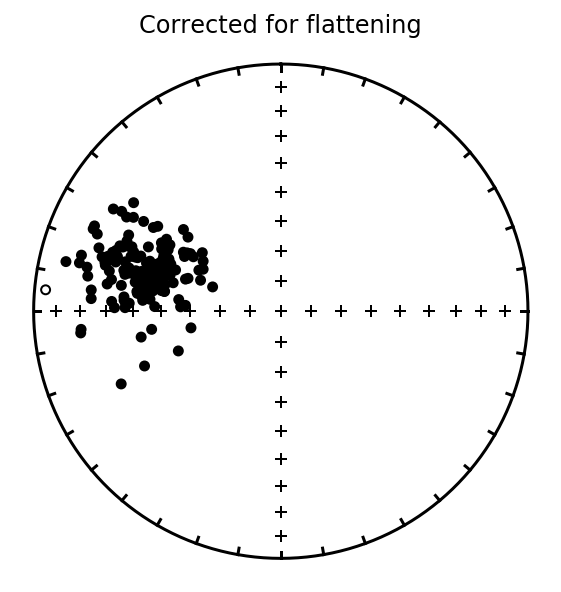

In [31]:
ht_tc_ei_corrected, EI_incs, EI_elongs, EI_fs = ipmag.find_ei(np.array(ht_tc_di_block),save=0, return_new_dirs=1, save_folder='./../code_output',return_values=True, fmt='png')

In [29]:
np.round(np.percentile(EI_fs, [2.5, 97.5]), 2)

array([0.51, 0.86])

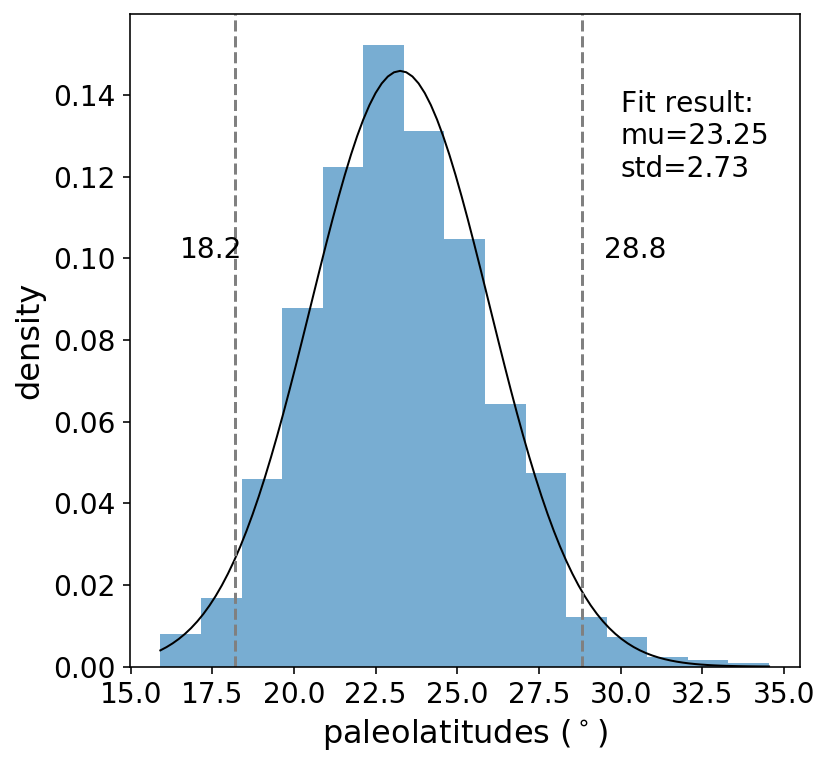

In [34]:
EI_plats = np.degrees(np.arctan(np.tan(np.radians(EI_incs))/2))

lower, upper = np.round(np.percentile(EI_plats, [2.5, 97.5]), 1)
mu, std = norm.fit(EI_plats)
x = np.linspace(min(EI_plats), max(EI_plats), 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(6,6))
plt.hist(EI_plats, bins=15, alpha=0.6, density=1)
plt.plot(x, p, 'k', linewidth=1)

plt.text(30, 0.12, 'Fit result:\nmu='+str(round(mu,2))+'\nstd='+str(round(std, 2)), fontsize=14)

plt.axvline(x=lower, color = 'gray', ls='--')
plt.axvline(x=upper, color = 'gray', ls='--')

plt.text(16.5, 0.10, str(lower), fontsize=14)
plt.text(29.5, 0.10, str(upper), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('paleolatitudes ($^\circ$)', fontsize=16)
plt.ylabel('density', fontsize=16)
# plt.savefig('../code_output/EI_Plat_histogram.pdf', bbox_inches='tight')

plt.show()

In [31]:
st.kstest(EI_plats, norm(loc=mu, scale=std).cdf)

KstestResult(statistic=0.02640712089240238, pvalue=0.4872209935828852)

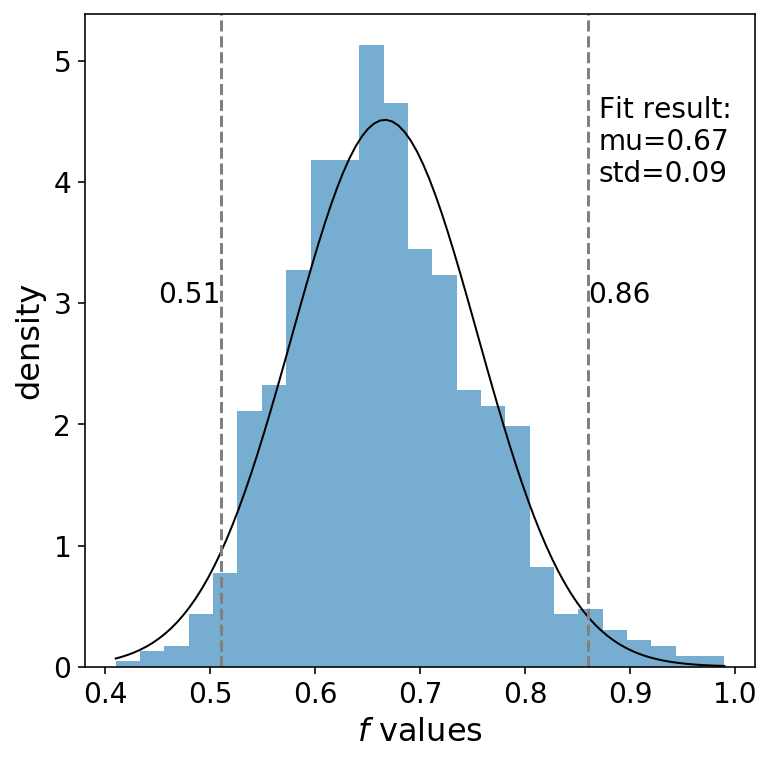

In [32]:
lower, upper = np.round(np.percentile(EI_fs, [2.5, 97.5]), 2)
mu, std = norm.fit(EI_fs)
x = np.linspace(min(EI_fs), max(EI_fs), 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(6,6))
plt.hist(EI_fs, bins=25, alpha=0.6, density=1)
# plt.title('All $f$ factors from bootstrap $E/I$ result', fontsize=14)
plt.plot(x, p, 'k', linewidth=1)

plt.text(0.87, 4, 'Fit result:\nmu='+str(round(mu,2))+'\nstd='+str(round(std, 2)), fontsize=14)

plt.axvline(x=lower, color = 'gray', ls='--')
plt.axvline(x=upper, color = 'gray', ls='--')

plt.text(0.45, 3, str(lower), fontsize=14)
plt.text(0.86, 3, str(upper), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$f$ values', fontsize=16)
plt.ylabel('density', fontsize=16)

# plt.savefig('../code_output/EI_f_histogram.pdf', bbox_inches='tight')
plt.show()

In [33]:
st.kstest(EI_fs, norm(loc=mu, scale=std).cdf)

KstestResult(statistic=0.044565622530674864, pvalue=0.03652935233373714)

## common mean test between f=0.50 and f=0.85 (the 95% bounds from result of E/I method)

In [228]:
original_dir_blocks = specimens_ht_tc[['dir_dec', 'dir_inc']].to_numpy()
dir_blocks_51 = np.array([original_dir_blocks.T[0], ipmag.unsquish(original_dir_blocks.T[1], 0.51)]).T
dir_blocks_85 = np.array([original_dir_blocks.T[0], ipmag.unsquish(original_dir_blocks.T[1], 0.85)]).T

dir_blocks_51_mean = ipmag.fisher_mean(di_block=dir_blocks_51)
dir_blocks_85_mean = ipmag.fisher_mean(di_block=dir_blocks_85)

dir_blocks_51_pole = pmag.dia_vgp(dir_blocks_51_mean['dec'], dir_blocks_51_mean['inc'], dir_blocks_51_mean['alpha95'], Cutface_lat, Cutface_lon)
dir_blocks_85_pole = pmag.dia_vgp(dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc'], dir_blocks_85_mean['alpha95'], Cutface_lat, Cutface_lon)

In [232]:
# angle between directions corrected by 95% bounds of f values
np.round(pmag.angle([dir_blocks_51_mean['dec'], dir_blocks_51_mean['inc']], [dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc']]),1)

array([13.3])

In [230]:
# angle between poles corrected by 95% bounds of f values
np.round(pmag.angle(dir_blocks_51_pole, dir_blocks_85_pole),1)

array([9.7])

In [32]:
ipmag.common_mean_watson(dir_blocks_50, dir_blocks_85)

Results of Watson V test: 

Watson's V:           150.6
Critical value of V:  6.2
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 13.8
Critical angle for M&M1990:   2.8



(0, 13.807726364947463, 2.8105698368106706)

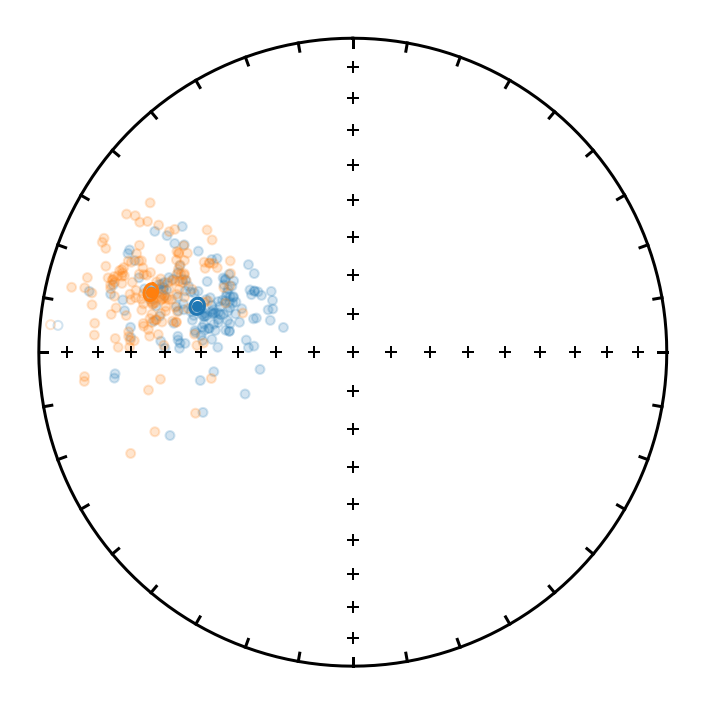

In [40]:
plt.figure(figsize=(5,5))
ipmag.plot_net()
ipmag.plot_di(dir_blocks_50.T[0], dir_blocks_50.T[1], color='C0', alpha=0.2)
ipmag.plot_di(dir_blocks_85.T[0], dir_blocks_85.T[1], color='C1', alpha=0.2)

ipmag.plot_di_mean(dir_blocks_50_mean['dec'], dir_blocks_50_mean['inc'], dir_blocks_50_mean['alpha95'], color='C0')
ipmag.plot_di_mean(dir_blocks_85_mean['dec'], dir_blocks_85_mean['inc'], dir_blocks_85_mean['alpha95'], color='C1')

# import empirical exhaust search method results from notebook Cutface_commone_mean

### comparing DRM and CRM directions with ht unsquished between 1 and 0 

In [20]:
all_factors_mt=np.loadtxt("../code_output/all_factors_mt.txt")
all_angles_mt=np.loadtxt("../code_output/all_angles_mt.txt")

In [21]:
good_factors_mt=np.loadtxt("../code_output/good_f_factors_mt.txt")
good_angles_mt=np.loadtxt("../code_output/good_angles_mt.txt")

In [22]:
index_angle_mt=np.argmin(good_angles_mt)
best_f_mt=round(good_factors_mt[index_angle_mt], 2)

In [44]:
print('The smallest angle between data sets is',round(min(good_angles_mt),2), 'which corresponds to an f factor of', best_f_mt,'.')

The smallest angle between data sets is 0.01 which corresponds to an f factor of 0.61 .


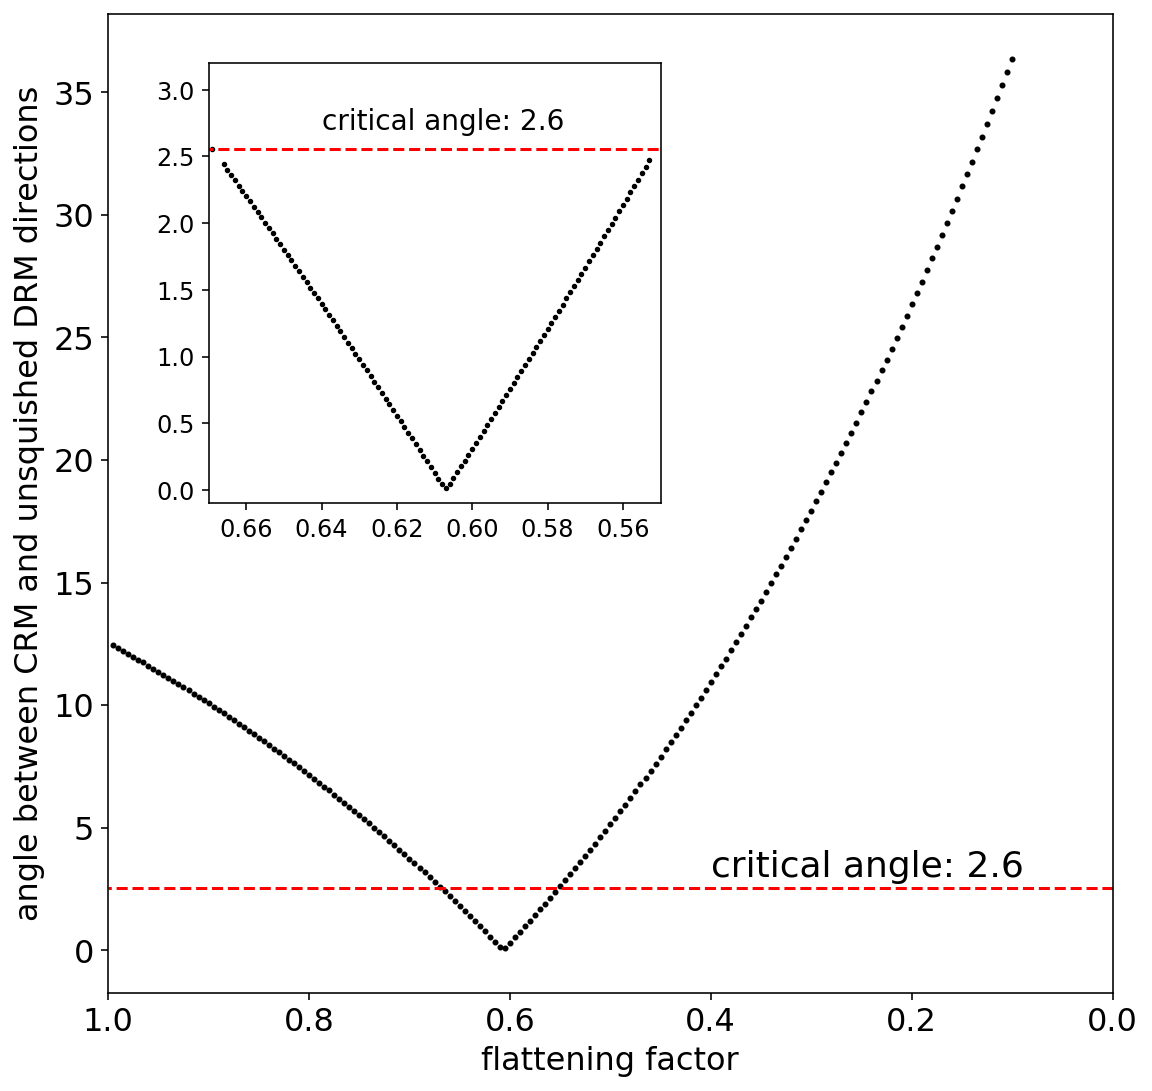

In [209]:
fig,inset=plt.subplots(figsize=(9,9))
inset.scatter(all_factors_mt,all_angles_mt,s=4,color='black')

x_crit=[0,1]
x_crit_inset=[.5,.7]
y_crit=[max(good_angles_mt),max(good_angles_mt)]
plt.plot(x_crit,y_crit,color='red',ls='--',label='critical angle')
plt.text(0.4, 3, 'critical angle: '+str(round(y_crit[0], 1)), fontsize=18)

fig_inset=inset.inset_axes([.1,.5,.45,.45])
fig_inset.scatter(good_factors_mt,good_angles_mt,s=3,color='black')
fig_inset.tick_params(labelsize=12)
fig_inset.invert_xaxis()
fig_inset.plot(x_crit_inset,y_crit,color='red',ls='--',label='critical angle')
fig_inset.text(0.64, 2.7, 'critical angle: '+str(round(y_crit[0], 1)), fontsize=14)
fig_inset.set_xlim(.67,.55)
fig_inset.set_ylim(-.1,3.2)

plt.xlabel('flattening factor',fontsize=16)
plt.ylabel('angle between CRM and unsquished DRM directions',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,0)

# plt.savefig('../code_output/angle_vs_f_MT.pdf',bbox_inches='tight',transparent=True)

plt.show()

### comparing ht and NSVG directions with ht unsquished between 1 and 0 

In [23]:
all_factors_nsvg=np.loadtxt("../code_output/all_factors_nsvg.txt")
all_angles_nsvg=np.loadtxt("../code_output/all_angles_nsvg.txt")

In [24]:
good_f_factors_nsvg=(np.loadtxt('../code_output/good_f_factors_nsvg.txt')).tolist()
good_angles_nsvg=(np.loadtxt('../code_output/good_angles_nsvg.txt')).tolist()

In [25]:
index_angle_nsvg=np.argmin(good_angles_nsvg)
best_f_nsvg=round(good_f_factors_nsvg[index_angle_nsvg], 2)

In [223]:
print('The smallest angle between data sets is',round(min(good_angles_nsvg),2), 'which corresponds to an f factor of', best_f_nsvg,'.')

The smallest angle between data sets is 3.69 which corresponds to an f factor of 0.65 .


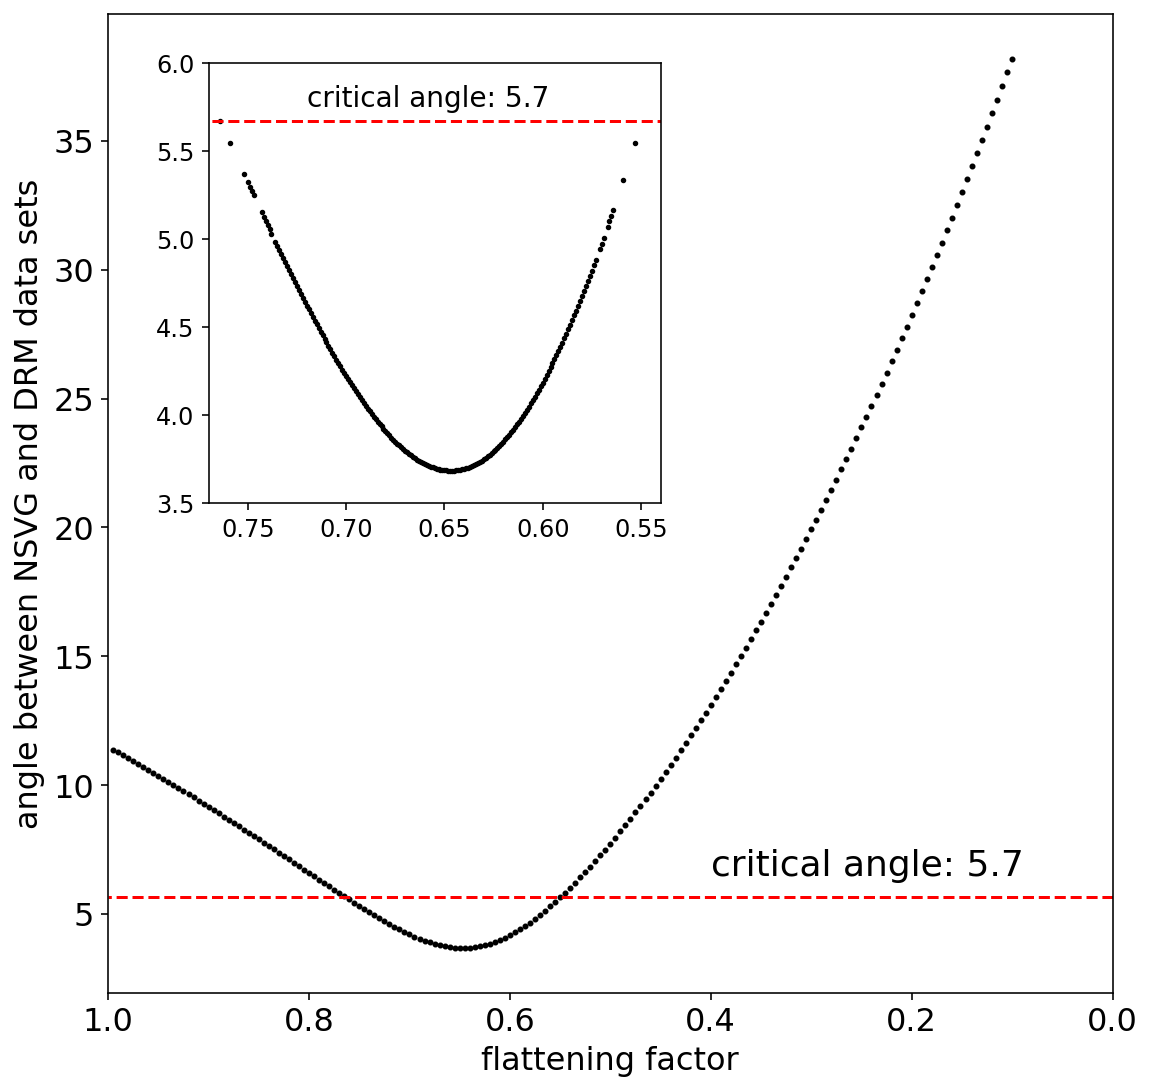

In [218]:
fig,inset=plt.subplots(figsize=(9,9))
plt.scatter(all_factors_nsvg,all_angles_nsvg,s=4,color='black')

x_crit=[0,1]
x_crit_inset=[0.52,0.78]
y_crit=[max(good_angles_nsvg),max(good_angles_nsvg)]
plt.plot(x_crit,y_crit,color='red',ls='--',label='critical angle')
plt.text(0.4, 6.5, 'critical angle: '+str(round(y_crit[0], 1)), fontsize=18)

fig_inset=inset.inset_axes([.1,.5,.45,.45])
fig_inset.scatter(good_f_factors_nsvg,good_angles_nsvg,s=3,color='black')
fig_inset.plot(x_crit_inset,y_crit,color='red',ls='--',label='critical angle')
fig_inset.tick_params(labelsize=12)
fig_inset.text(0.72, 5.75, 'critical angle: '+str(round(y_crit[0], 1)), fontsize=14)
fig_inset.set_xlim(.77,.54)
fig_inset.set_ylim(3.5,6)
# fig_inset.invert_xaxis()
plt.xlabel('flattening factor',fontsize=16)
plt.ylabel('angle between NSVG and DRM data sets',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,0)

plt.savefig('../code_output/angle_vs_f_NSVG.pdf',bbox_inches='tight',transparent=True)

plt.show()

# comparing e/i method to the empirically derived factor

In [26]:
def elongation_calc(di_block):
    princ_comps = pmag.doprinc(di_block)
    elongation = princ_comps['tau2']/princ_comps['tau3']
    return elongation

def elongation_bootstrap(di_block, nb=1000):
    elong_list = []
    inc_list = []
    for n in range(nb): 
        pDIs = pmag.pseudo(di_block)
        pseudo_elong = elongation_calc(pDIs)
        elong_list.append(pseudo_elong)
        mean = pmag.fisher_mean(pDIs)
        inc_list.append(mean['inc'])
    low = round(np.percentile(elong_list, 2.5), 4)
    high = round(np.percentile(elong_list,97.5), 4)
    elong = round(elongation_calc(di_block), 4)
    mean = pmag.fisher_mean(di_block)
    inc = mean['inc']
    inc_low = round(np.percentile(inc_list, 2.5), 4)
    inc_high = round(np.percentile(inc_list, 97.5), 4)
    return [elong, low, high], [inc, inc_low, inc_high]
#     return [elong_list, elong, low, high], [inc_list, inc, inc_low, inc_high]
#     print(elong, low, high, inc, inc_low, inc_high)
    
xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

In [32]:
ht_unsquished_incs = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(),best_f_nsvg)
ht_di_block_f_corrected = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_unsquished_incs)

mt_elong, mt_inc = elongation_bootstrap(mt_tc_di_block)
ht_elong, ht_inc = elongation_bootstrap(ht_tc_di_block)
ht_elong_ei, ht_inc_ei = elongation_bootstrap(ht_tc_ei_corrected)
ht_elong_f, ht_inc_f = elongation_bootstrap(ht_di_block_f_corrected)

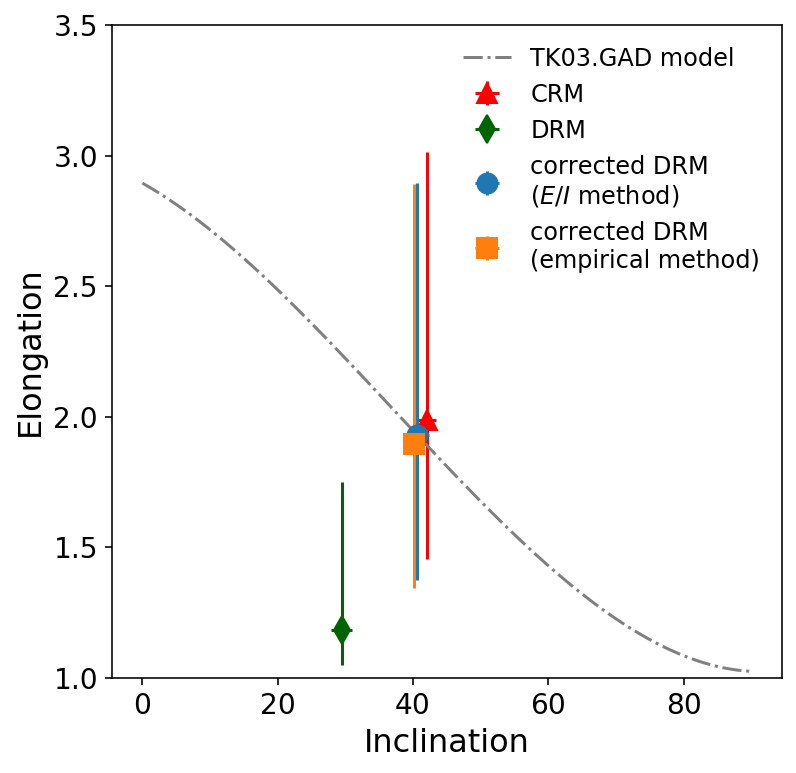

In [38]:
tk03_curve=plt.figure(figsize=(6,6))
plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD model',linestyle='-.')
plt.ylim(1,3.5)
plt.errorbar(mt_inc[0], mt_elong[0], yerr=[[mt_elong[0]-mt_elong[1]],[mt_elong[2]-mt_elong[0]]], 
             xerr=[[mt_inc[0]-mt_inc[1]],[mt_inc[2]-mt_inc[0]]], fmt='^', ms=10,color='r', label='CRM')
plt.errorbar(ht_inc[0], ht_elong[0], yerr=[[ht_elong[0]-ht_elong[1]],[ht_elong[2]-ht_elong[0]]], 
             xerr=[[ht_inc[0]-ht_inc[1]],[ht_inc[2]-ht_inc[0]]], fmt='d', ms=10,color='darkgreen', label='DRM')
plt.errorbar(ht_inc_ei[0], ht_elong_ei[0], yerr=[[ht_elong_ei[0]-ht_elong_ei[1]],[ht_elong_ei[2]-ht_elong_ei[0]]], 
             xerr=[[ht_inc_ei[0]-ht_inc_ei[1]],[ht_inc_ei[2]-ht_inc_ei[0]]], fmt='o', ms=10,color='C0', label='corrected DRM\n($E/I$ method)')
plt.errorbar(ht_inc_f[0], ht_elong_f[0], yerr=[[ht_elong_f[0]-ht_elong_f[1]],[ht_elong_f[2]-ht_elong_f[0]]], 
             xerr=[[ht_inc_f[0]-ht_inc_f[1]],[ht_inc_f[2]-ht_inc_f[0]]], fmt='s', ms=10,color='C1', label='corrected DRM\n(empirical method)')
plt.ylabel('Elongation', fontsize=16)
plt.xlabel('Inclination', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, frameon=0, fontsize=12)
tk03_curve.savefig('../code_output/tk03_curve.pdf', bbox_inches='tight')
plt.show()

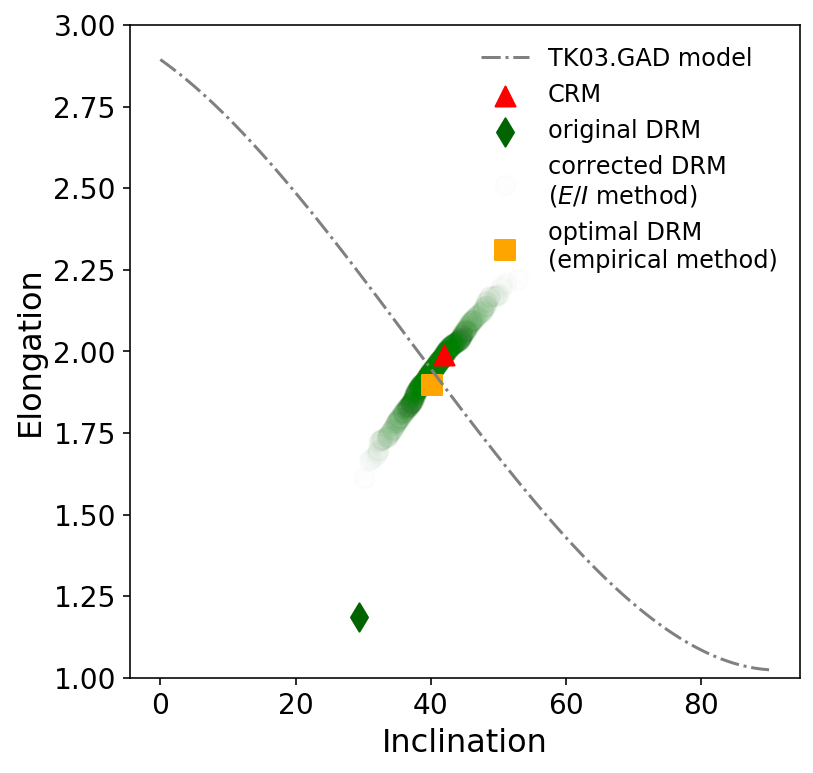

In [162]:
tk03_curve=plt.figure(figsize=(6,6))
plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD model',linestyle='-.')
plt.ylim(1,3)
plt.scatter(mt_inc[0], mt_elong[0], marker='^', s=100,color='r', zorder=10001, label='CRM')
plt.scatter(ht_inc[0], ht_elong[0], marker='d', s=100,color='darkgreen', zorder=10001, label='original DRM')
plt.scatter(EI_incs, EI_elongs, alpha=0.01, marker='o', s=100,color='g', label='corrected DRM\n($E/I$ method)')
plt.scatter(ht_inc_f[0], ht_elong_f[0], marker='s', s=100,color='orange', label='optimal DRM\n(empirical method)')
# plt.scatter(ht_inc_ei[0], ht_elong_ei[0],  marker='d', s=100,color='blue', label='corrected DRM\n($E/I$ method)')

plt.ylabel('Elongation', fontsize=16)
plt.xlabel('Inclination', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, frameon=0, fontsize=12)
# tk03_curve.savefig('../code_output/tk03_curve.pdf', bbox_inches='tight')
plt.show()

In [96]:
#best_f_nsvg
#f_factor_ht_mt
#f_factor_ht_NSVG
Cutface_lat = 47.73055
Cutface_lon = -90.44128
e_i_corrected_incs=ipmag.unsquish(specimens_ht_tc['dir_inc'],0.684999)
ht_mt_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.607)
ht_nsvg_incs_watson_unsquish=ipmag.unsquish(specimens_ht_tc['dir_inc'],.635)

In [97]:
e_i_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),e_i_corrected_incs.tolist())
emp_mt_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),ht_mt_incs_watson_unsquish.tolist())
emp_nsvg_corrected_mean_directions=ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),ht_nsvg_incs_watson_unsquish.tolist())
print(e_i_corrected_mean_directions)
print(emp_mt_corrected_mean_directions)
print(emp_nsvg_corrected_mean_directions)

{'dec': 286.5048782593329, 'inc': 38.82895481997779, 'n': 157, 'r': 152.32153791504106, 'k': 33.34429074492953, 'alpha95': 1.9774595329914586, 'csd': 14.027306186235746}
{'dec': 286.47929301521356, 'inc': 42.00547572948422, 'n': 157, 'r': 152.3010529707002, 'k': 33.198927127136784, 'alpha95': 1.981917738165165, 'csd': 14.057982370469666}
{'dec': 286.48894249311326, 'inc': 40.815532713148016, 'n': 157, 'r': 152.30290935622492, 'k': 33.21204801673185, 'alpha95': 1.9815140907061155, 'csd': 14.055205193707877}


In [98]:
e_i_corrected_vgp=pmag.dia_vgp(e_i_corrected_mean_directions['dec'],e_i_corrected_mean_directions['inc'],1.7756643774953274,Cutface_lat,Cutface_lon)
emp_mt_corrected_vgp=pmag.dia_vgp(emp_mt_corrected_mean_directions['dec'],emp_mt_corrected_mean_directions['inc'],1.8852789568829134,Cutface_lat,Cutface_lon)
emp_nsvg_corrected_vgp=pmag.dia_vgp(emp_nsvg_corrected_mean_directions['dec'],emp_nsvg_corrected_mean_directions['inc'],1.8852789568829134,Cutface_lat,Cutface_lon)



<Figure size 504x504 with 0 Axes>

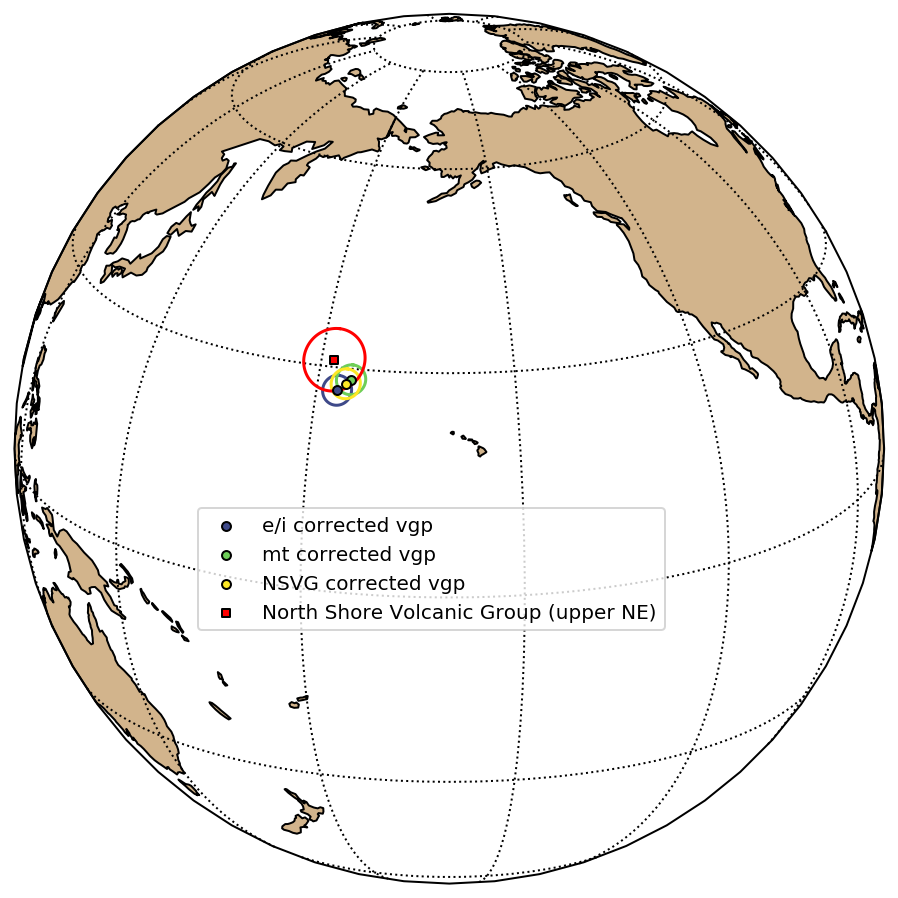

In [99]:
vgp_mt_ei=plt.figure(figsize=(7, 7))
map_axis_vgp=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis_vgp,e_i_corrected_vgp[0],e_i_corrected_vgp[1],e_i_corrected_mean_directions['alpha95'],color=viridis(2),label='e/i corrected vgp')
ipmag.plot_pole(map_axis_vgp,emp_mt_corrected_vgp[0],emp_mt_corrected_vgp[1],emp_mt_corrected_mean_directions['alpha95'],color=viridis(7),label='mt corrected vgp')
ipmag.plot_pole(map_axis_vgp,emp_nsvg_corrected_vgp[0],emp_nsvg_corrected_vgp[1],emp_nsvg_corrected_mean_directions['alpha95'],color=viridis(9),label='NSVG corrected vgp')


ipmag.plot_pole(map_axis_vgp,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

plt.legend(loc=3,bbox_to_anchor=(.2,.28))
# plt.savefig('../code_output/vgp_mt_ei.pdf',bbox='tight')

plt.show()

## Difference in shallowing as a function of grain size

In [5]:
cf_grain_sizes=pd.read_csv('../../data/Pmag/cf_specimen_lithologies.csv')
cf_specimens_directions_and_grain=pd.merge(cf_grain_sizes,Cutface_specimens,on='specimen')

In [101]:
cf_fm_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']>=3) & 
                                                  (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                                  (cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

cf_vfs_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']==2) & 
                                               (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                               (cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

cf_silt_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']<=1) & 
                                                (cf_specimens_directions_and_grain['dir_comp']=='ht')&
                                                (cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

### fine to medium grained specimens

In [102]:
cf_fm_grain_mean=ipmag.fisher_mean(cf_fm_grain['dir_dec'].tolist(),cf_fm_grain['dir_inc'].tolist())
cf_fm_grain_mean

{'dec': 285.8802036811143,
 'inc': 32.64879395708542,
 'n': 56,
 'r': 54.32735738545677,
 'k': 32.88209897427467,
 'alpha95': 3.364364812736884,
 'csd': 14.125546292906932}

### very fine grained specimens

In [103]:
cf_vfs_grain_mean=ipmag.fisher_mean(cf_vfs_grain['dir_dec'].tolist(),cf_vfs_grain['dir_inc'].tolist())
cf_vfs_grain_mean

{'dec': 286.2520408698588,
 'inc': 29.85140462002685,
 'n': 41,
 'r': 39.91030329326937,
 'k': 36.70746158351745,
 'alpha95': 3.7344659218800533,
 'csd': 13.369274562274919}

### silt and clay

In [104]:
cf_silt_grain_mean=ipmag.fisher_mean(cf_silt_grain['dir_dec'].tolist(),cf_silt_grain['dir_inc'].tolist())
cf_silt_grain_mean

{'dec': 287.39599196618065,
 'inc': 26.154447834080703,
 'n': 60,
 'r': 58.592540354575135,
 'k': 41.91949672716185,
 'alpha95': 2.8664303395983954,
 'csd': 12.510566878478787}

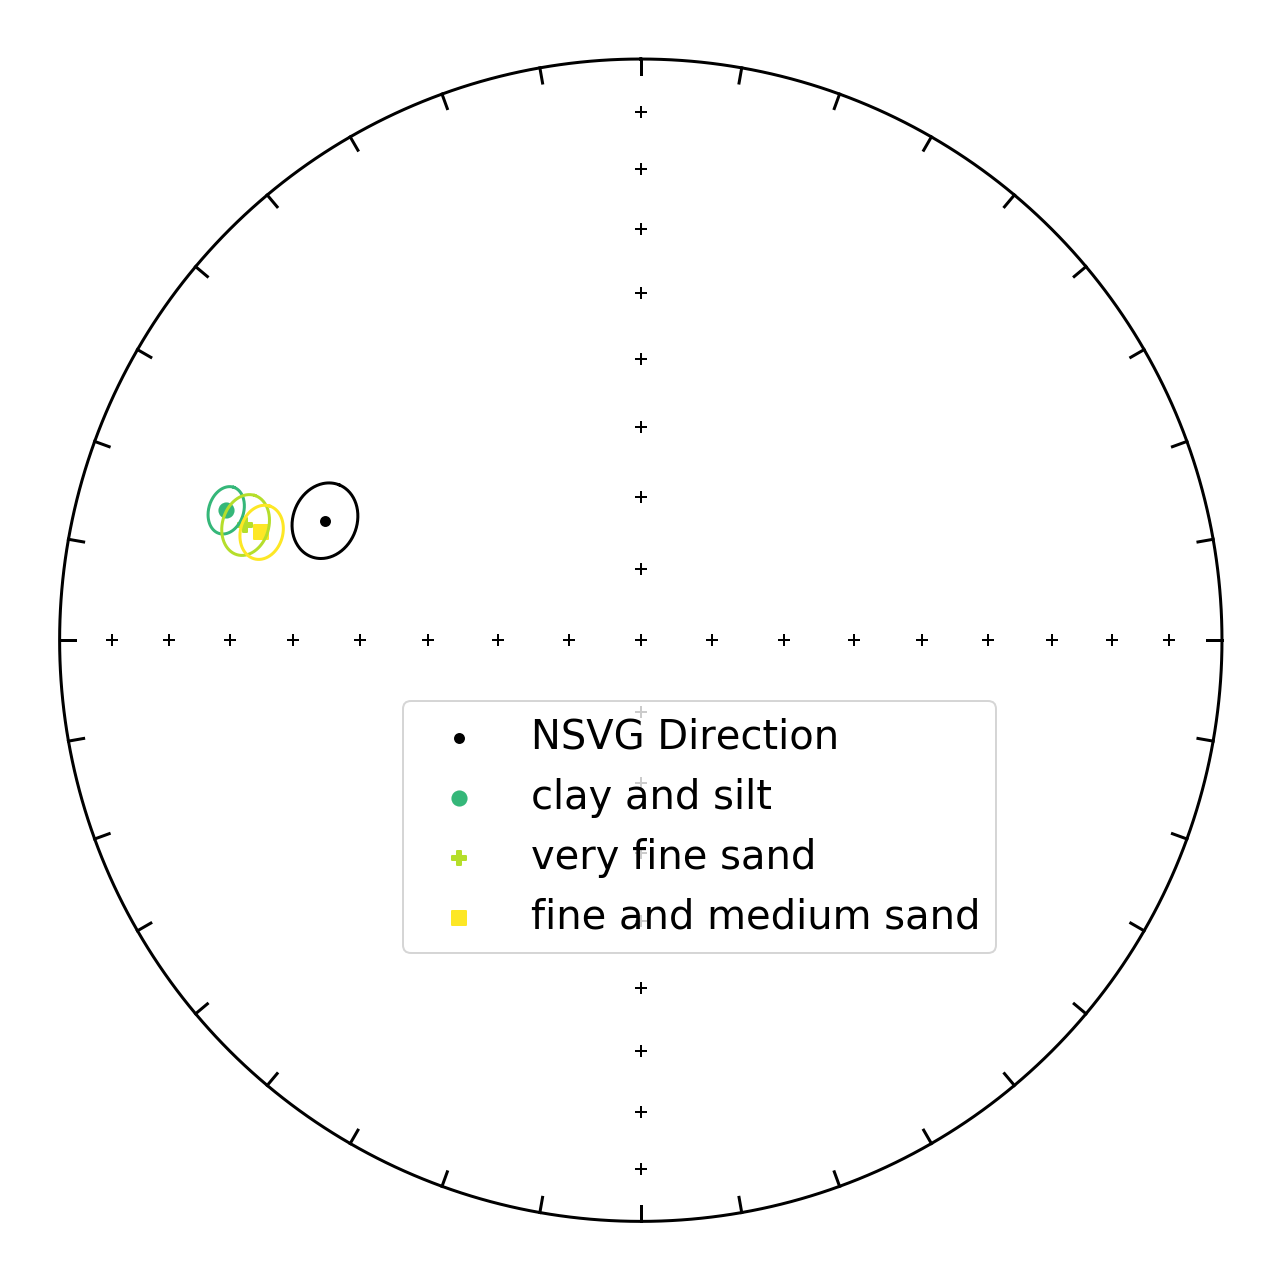

In [190]:
grain_size_stereonet=plt.figure(num=fignum,figsize=(9,9))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_a95, label='NSVG Direction') #need to replace with direction a95
ipmag.plot_di_mean(cf_silt_grain_mean['dec'],cf_silt_grain_mean['inc'],cf_silt_grain_mean['alpha95'],color= viridis(6),label='clay and silt',marker='o',markersize=50)
ipmag.plot_di_mean(cf_vfs_grain_mean['dec'],cf_vfs_grain_mean['inc'],cf_vfs_grain_mean['alpha95'],color=viridis(8), label='very fine sand',marker='P',markersize=50)
ipmag.plot_di_mean(cf_fm_grain_mean['dec'],cf_fm_grain_mean['inc'],cf_fm_grain_mean['alpha95'],color=viridis(10),label='fine and medium sand',marker='s',markersize=50)

plt.legend(loc=[.31,.25],fontsize=20)
grain_size_stereonet.savefig('../code_output/grain_size_stereonet.pdf', bbox_inches='tight',transparent=True)                   
plt.show()

## do rip ups affect the inclination? yes!

In [108]:
cf_no_rip_ups=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['rip_ups']== 'n') & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_no_rip_ups_mean=ipmag.fisher_mean(cf_no_rip_ups['dir_dec'].tolist(),cf_no_rip_ups['dir_inc'].tolist())
cf_no_rip_ups_mean

{'dec': 286.2651552185065,
 'inc': 29.057694337996054,
 'n': 146,
 'r': 141.85592261127525,
 'k': 34.98969406182361,
 'alpha95': 2.001079811780064,
 'csd': 13.69351513961189}

In [109]:
cf_yes_rip_ups=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['rip_ups']== 'y') & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_yes_rip_ups_mean=ipmag.fisher_mean(cf_yes_rip_ups['dir_dec'].tolist(),cf_yes_rip_ups['dir_inc'].tolist())
cf_yes_rip_ups_mean

{'dec': 290.88710005780604,
 'inc': 34.23687362466882,
 'n': 11,
 'r': 10.848500034188547,
 'k': 66.00661555557926,
 'alpha95': 5.661406899635496,
 'csd': 9.96991111138382}

## Below we show that there is minimal stgrtigraphic bias of inclination shallowing in Cut Face

In [6]:
strat_heights=pd.read_csv('../../data/specimen_strat_height_new.csv',header=0)
specimens_w_strat_heights=pd.merge(specimens_ht_tc,strat_heights, on='specimen')

specimens_above_68_meters=specimens_w_strat_heights[specimens_w_strat_heights['strat_level']>68]
specimens_below_68_meters=specimens_w_strat_heights[specimens_w_strat_heights['strat_level']<68]

In [111]:
mean_above_68_meters = ipmag.fisher_mean(specimens_above_68_meters['dir_dec'].tolist(),specimens_above_68_meters['dir_inc'].tolist())
mean_above_68_meters

{'dec': 288.6872294044219,
 'inc': 29.397291005180204,
 'n': 30,
 'r': 29.372164239278163,
 'k': 46.190424015761785,
 'alpha95': 3.9087844396735054,
 'csd': 11.918155414579386}

In [112]:
mean_below_68_meters = ipmag.fisher_mean(specimens_below_68_meters['dir_dec'].tolist(),specimens_below_68_meters['dir_inc'].tolist())
mean_below_68_meters

{'dec': 286.1343594246629,
 'inc': 29.304117067219348,
 'n': 124,
 'r': 120.40982825509072,
 'k': 34.26019943876193,
 'alpha95': 2.1970480868212974,
 'csd': 13.838533693398727}

## export specimen data .csv file with strat heights with grain size

In [10]:
gs_mapping = pd.Series(data=['silt', 'silt', 'very fine', 'fine', 'medium'] , index=[0,1,2,3,4])
gs_mapping

0         silt
1         silt
2    very fine
3         fine
4       medium
dtype: object

In [13]:
cf_specimens_directions_and_grain.columns

Index(['specimen', 'primary_grain_size', 'percent_primary',
       'secondary_grain_size', 'rip_ups', 'notes', 'key', 'experiments',
       'sample', 'dir_alpha95', 'dir_comp', 'dir_dec', 'dir_inc',
       'dir_n_comps', 'dir_n_measurements', 'dir_tilt_correction', 'dir_dang',
       'dir_mad_free', 'meas_step_max', 'meas_step_min', 'meas_step_unit',
       'analysts', 'instrument_codes', 'software_packages', 'int_corr',
       'citations', 'method_codes', 'result_quality', 'volume', 'weight',
       'location', 'site'],
      dtype='object')

In [14]:
specimens_w_strat_gs = pd.merge(cf_specimens_directions_and_grain[['specimen', 'primary_grain_size', 'experiments',
       'sample', 'dir_alpha95', 'dir_comp', 'dir_dec', 'dir_inc',
       'dir_n_comps', 'dir_n_measurements', 'dir_tilt_correction', 'dir_dang',
       'dir_mad_free', 'meas_step_max', 'meas_step_min', 'meas_step_unit',
       'analysts', 'instrument_codes', 'software_packages', 'int_corr',
       'citations', 'method_codes', 'result_quality', 'volume', 'weight',
       'location', 'site']],strat_heights, on='specimen')
specimens_w_strat_gs['grain_size'] = [gs_mapping[i] for i in specimens_w_strat_gs['primary_grain_size']]
specimens_w_strat_gs

,specimen,primary_grain_size,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,strat_level,grain_size
0,CF-130a,0,CF-130a_LP-DIR-T,CF-130,NaN,mt,300.4,35.5,3.0,8.0,100.0,6.8,3.8,873.0,773.0,K,NaN,hargrave 2021-02-13 19:25:50,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cut Face Creek,CF,59.9,silt
1,CF-130a,0,NaN,CF-130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,James Pierce,NaN,NaN,NaN,This study,LP-NOMAG,NaN,NaN,NaN,Cut Face Creek,CF,59.9,silt
2,CF-130a,0,CF-130a_LP-DIR-T,CF-130,NaN,lt,321.0,82.7,3.0,3.0,100.0,38.8,4.8,473.0,273.0,K,NaN,hargrave 2021-02-13 19:25:50,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cut Face Creek,CF,59.9,silt
3,CF-130a,0,CF-130a_LP-DIR-T,CF-130,NaN,mt,119.1,62.5,3.0,8.0,-1.0,6.8,3.8,873.0,773.0,K,NaN,hargrave 2021-02-13 19:25:50,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR,g,NaN,NaN,Cut Face Creek,CF,59.9,silt
4,CF-130a,0,CF-130a_LP-DIR-T,CF-130,NaN,mt,304.8,28.3,3.0,8.0,0.0,6.8,3.8,873.0,773.0,K,NaN,hargrave 2021-02-13 19:25:50,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cut Face Creek,CF,59.9,silt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,CF-185a,4,CF-185a_LP-DIR-T,CF-185,NaN,ht,133.8,39.3,2.0,7.0,-1.0,0.0,11.4,953.0,937.0,K,NaN,hargrave 2021-02-16 12:27:04,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL-A:DA-DIR,g,NaN,NaN,Cut Face Creek,CF,94.1,medium
1447,CF-186a,4,CF-186a_LP-DIR-T,CF-186,NaN,mt,293.7,44.4,1.0,21.0,100.0,0.8,2.0,951.0,723.0,K,NaN,hargrave 2021-02-13 12:01:05,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-TILT,g,NaN,NaN,Cut Face Creek,CF,94.6,medium
1448,CF-186a,4,CF-186a_LP-DIR-T,CF-186,NaN,mt,300.4,37.9,1.0,21.0,0.0,0.8,2.0,951.0,723.0,K,NaN,hargrave 2021-02-13 12:01:05,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cut Face Creek,CF,94.6,medium
1449,CF-186a,4,CF-186a_LP-DIR-T,CF-186,NaN,mt,138.9,58.4,1.0,21.0,-1.0,0.8,2.0,951.0,723.0,K,NaN,hargrave 2021-02-13 12:01:05,pmagpy-4.2.24-1: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR,g,NaN,NaN,Cut Face Creek,CF,94.6,medium


In [15]:
# specimens_w_strat_gs.to_csv('../../data/Pmag/cutface/specimens_w_strat_gs.txt', sep='\t', index=0)

## summary plot for f factor

In [39]:
best_f_EI = 0.64
best_f_EI

0.64

In [40]:
good_factors_nsvg=np.loadtxt("../code_output/good_f_factors_nsvg.txt")
good_angles_nsvg=np.loadtxt("../code_output/good_angles_nsvg.txt")

best_f_nsvg = np.round(good_factors_nsvg[np.argmin(good_angles_nsvg)],3)

In [41]:
good_factors_silt=np.loadtxt("../code_output/good_f_factors_silt.txt")
good_angles_silt=np.loadtxt("../code_output/good_angles_silt.txt")

best_f_silt = np.round(good_factors_silt[np.argmin(good_angles_silt)],3)

In [42]:
good_factors_vf=np.loadtxt("../code_output/good_f_factors_vf.txt")
good_angles_vf=np.loadtxt("../code_output/good_angles_vf.txt")

best_f_vf = np.round(good_factors_vf[np.argmin(good_angles_vf)],3)

In [43]:
good_factors_fm=np.loadtxt("../code_output/good_f_factors_fm.txt")
good_angles_fm=np.loadtxt("../code_output/good_angles_fm.txt")

best_f_fm = np.round(good_factors_fm[np.argmin(good_angles_fm)],3)

In [44]:
best_f_silt, best_f_vf, best_f_fm

(0.56, 0.66, 0.74)

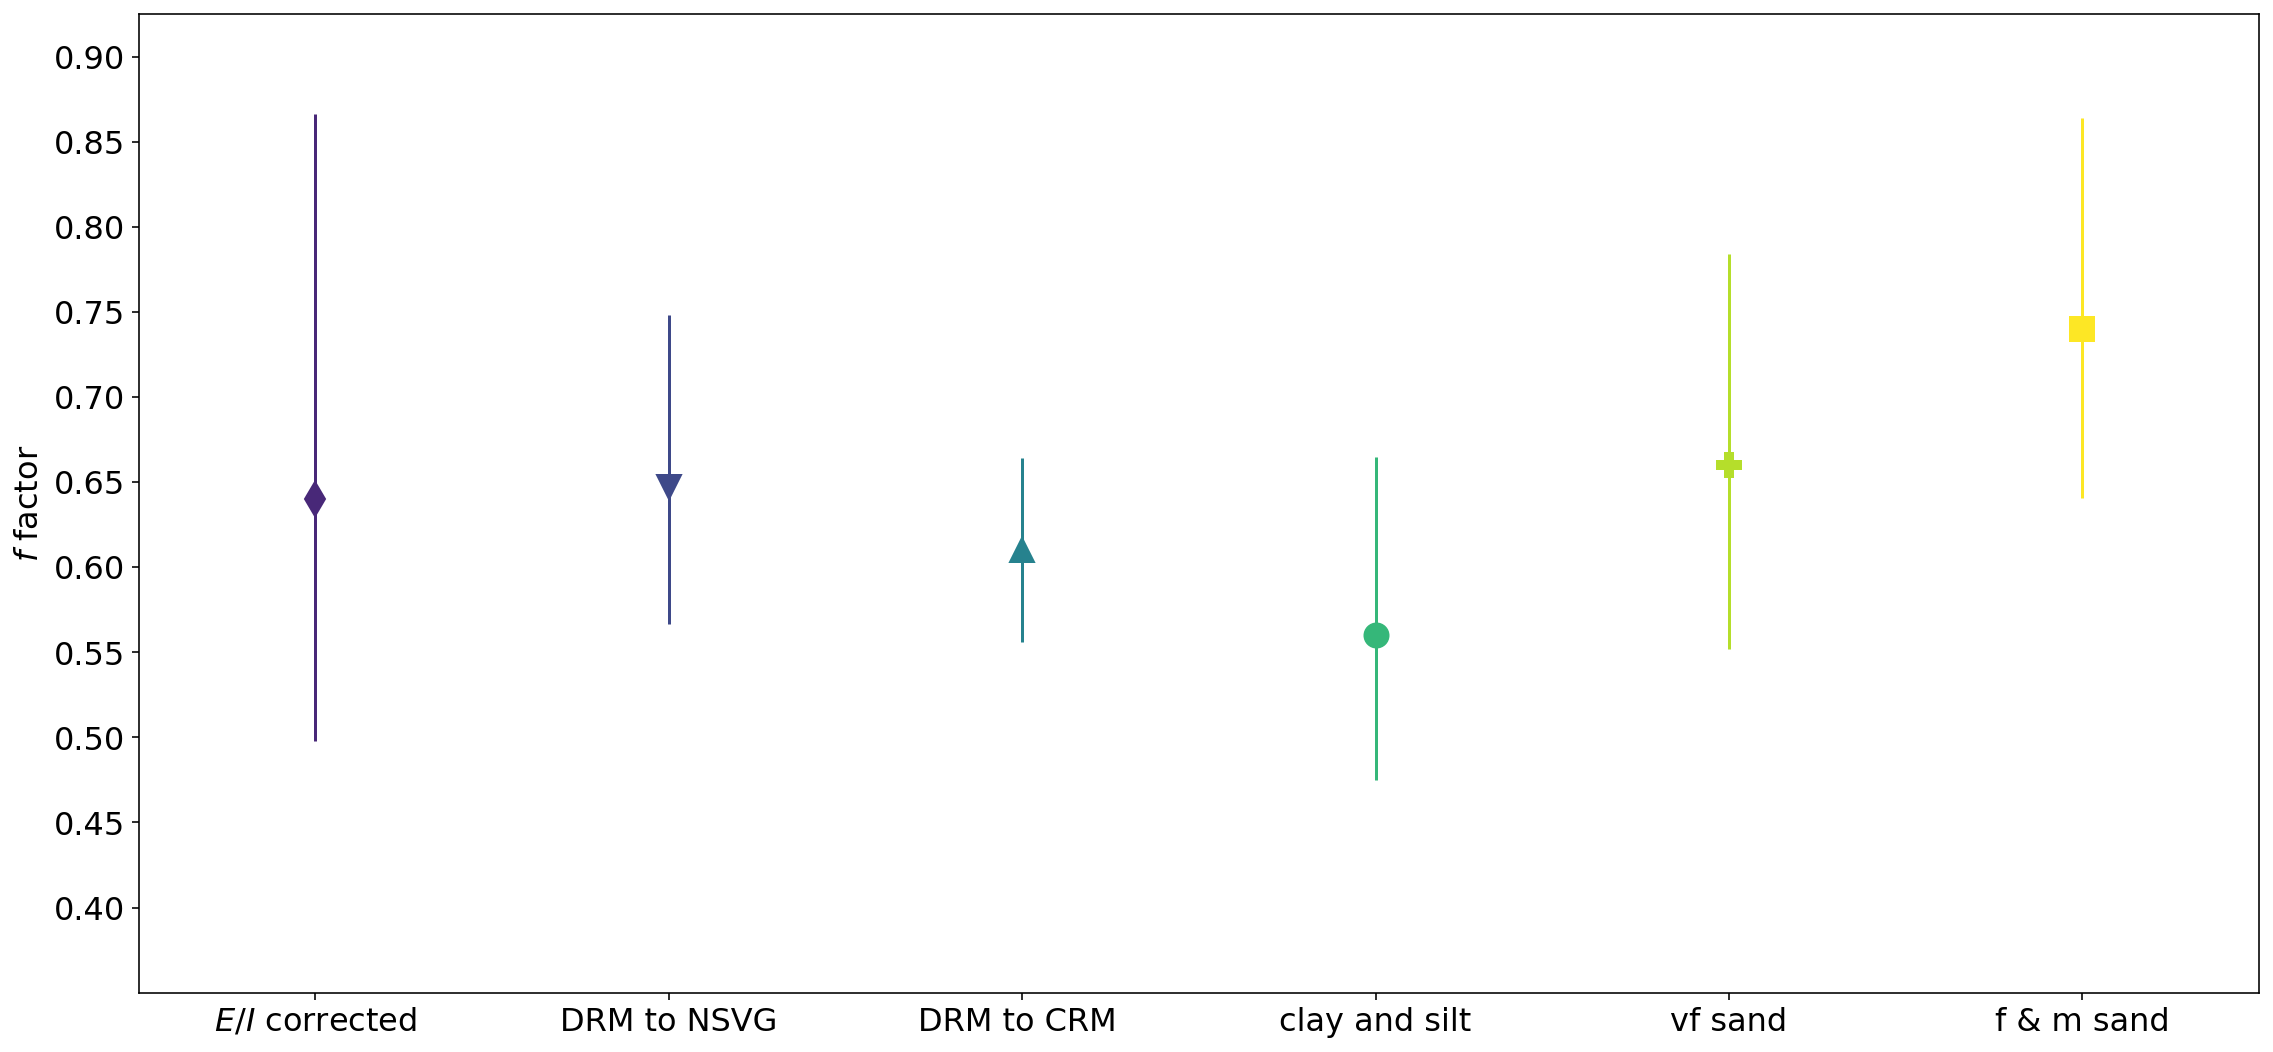

In [48]:
summary_f_figure=plt.figure(figsize=(19,9))
plt.ylim(.35,.925)

final_f_ei=['$E/I$ corrected']
final_f_nsvg=['DRM to NSVG']
final_f=['DRM to CRM ']
clay_silt=['clay and silt']
vf_sand=['vf sand']
f_m_sand=['f & m sand']

tick_range=np.arange(.40,.95,.05)

plt.yticks(tick_range,fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('$f$ factor',fontsize=16)

plt.margins(x=.1)

plt.errorbar(final_f_ei, best_f_EI, yerr=np.abs([np.percentile(EI_fs, [2.5,97.5])-best_f_EI]).T, marker='d',markersize='12',color= viridis(1))

plt.errorbar(final_f_nsvg,best_f_nsvg, yerr=np.abs([np.percentile(good_factors_nsvg, [2.5, 97.5])-best_f_nsvg]).T, marker='v',markersize='12',color= viridis(2))

plt.errorbar(final_f,best_f_mt, yerr=np.abs([np.percentile(good_factors_mt, [2.5, 97.5])-best_f_mt]).T, marker='^',markersize='12',color= viridis(4))

plt.errorbar(clay_silt,best_f_silt,yerr=np.abs([np.percentile(good_factors_silt, [2.5, 97.5])-best_f_silt]).T,marker='o',markersize='12',color= viridis(6))

plt.errorbar(vf_sand,best_f_vf,yerr=np.abs([np.percentile(good_factors_vf, [2.5, 97.5])-best_f_vf]).T,marker='P',markersize='12',color= viridis(8))

plt.errorbar(f_m_sand,best_f_fm,yerr=np.abs([np.percentile(good_factors_fm, [2.5, 97.5])-best_f_fm]).T,marker='s',markersize='12',color= viridis(10))


plt.savefig('../code_output/summary_f_figure.pdf',bbox_inches='tight',transparent=True)

plt.show()

In [237]:
best_f_silt, np.round(np.percentile(good_factors_silt, [2.5, 97.5]), 2)

(0.56, array([0.48, 0.67]))

In [240]:
best_f_vf, np.round(np.percentile(good_factors_vf, [2.5, 97.5]), 2)

(0.66, array([0.55, 0.78]))

In [241]:
best_f_fm, np.round(np.percentile(good_factors_fm, [2.5, 97.5]), 2)

(0.74, array([0.64, 0.86]))

In [215]:
best_f_EI[0][0], np.round(np.percentile(EI_fs, [97.5,2.5]), 2)

(0.65, array([0.85, 0.51]))

In [214]:
np.round(np.percentile(good_factors_mt, [2.5, 50, 97.5]), 2)

array([0.56, 0.61, 0.66])

In [213]:
np.round(np.percentile(good_factors_nsvg, [2.5, 50, 97.5]), 2)

array([0.57, 0.66, 0.75])

## Develop a, ipmag.find_ei_Kent function in Pmagpy that streamlines the E/I method and Kent ellipse parameter estimate

Bootstrapping.... be patient

The original inclination was: 29.43

The corrected inclination is: 40.74
with bootstrapped confidence bounds of: 32.31 to 48.14
and elongation parameter of: 1.93
The flattening factor is: 0.64
with bootstrapped confidence bounds of: 0.89 to 0.51


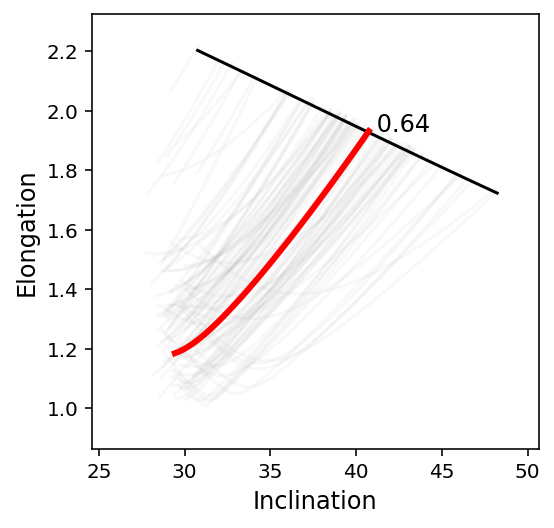

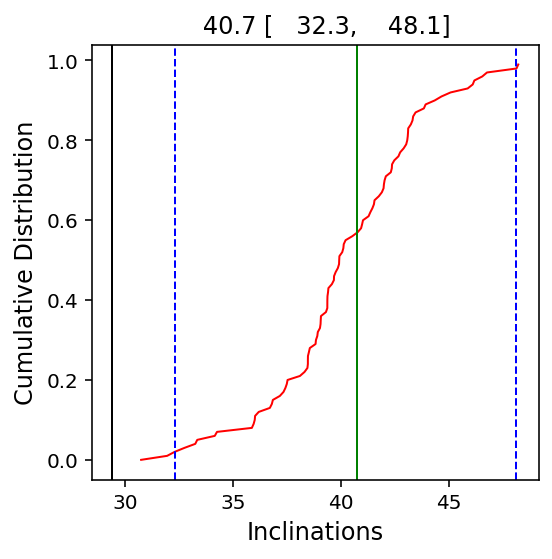

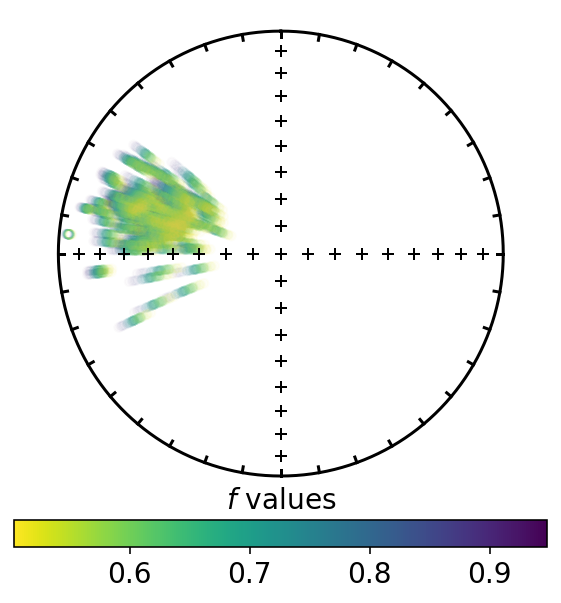

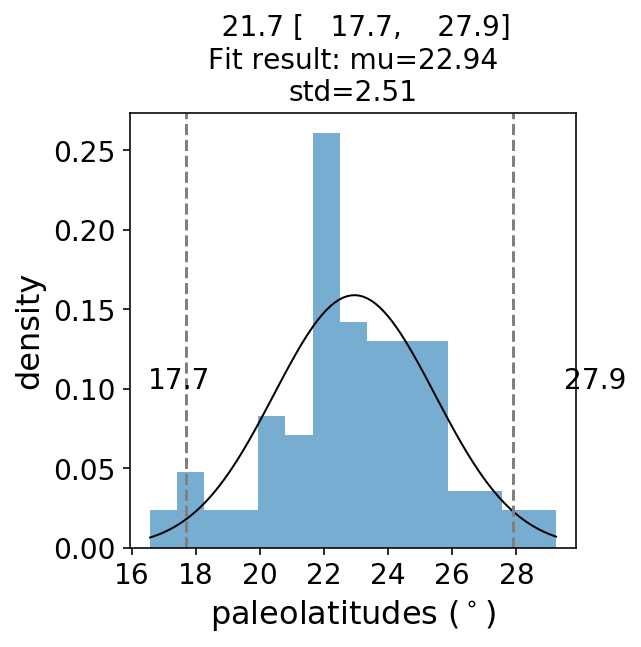

<Figure size 576x576 with 0 Axes>

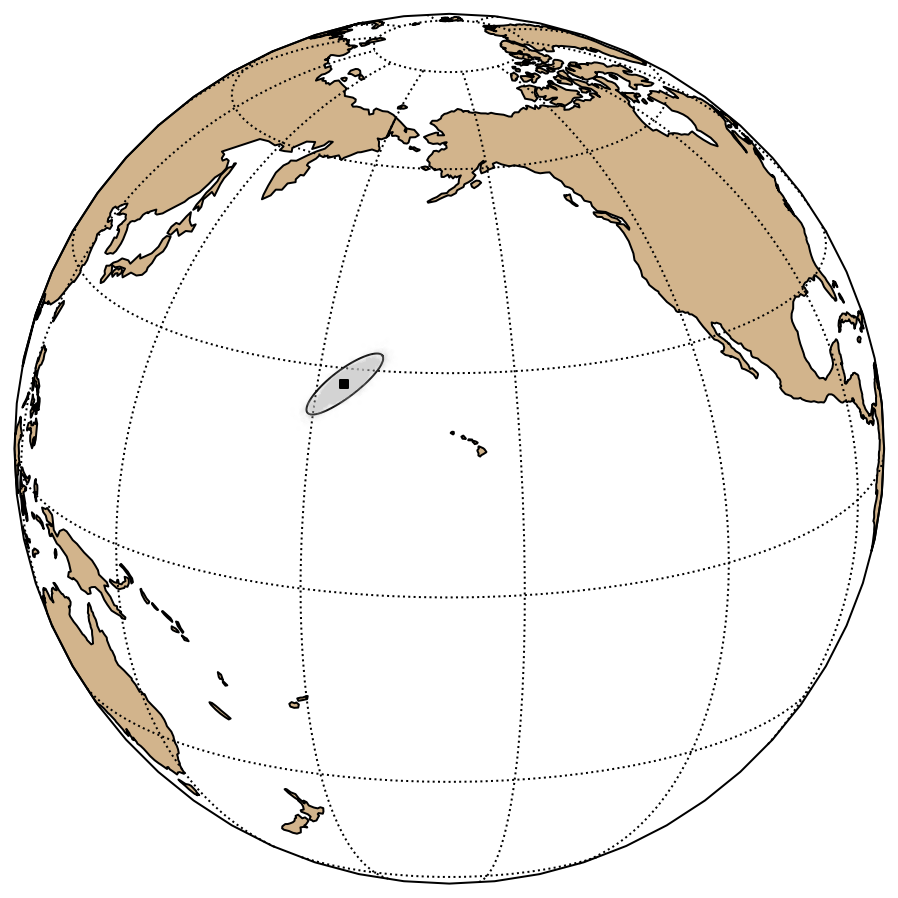

In [6]:
ipmag.find_ei_Kent(np.array(ht_tc_di_block), Cutface_lat,Cutface_lon, nb=100, central_longitude=200, central_latitude=20)